## Methodology

Loading the Dataset in VS Code

In [1]:
# Step 1: Load required libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Step 3: View the first 5 rows
df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Exploratory Data Analysis

Basic Info of the Dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Basic info
print("Shape:", df.shape)
print("\nInfo:")
df.info()


Shape: (2240, 29)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurch

Missing values heatmap

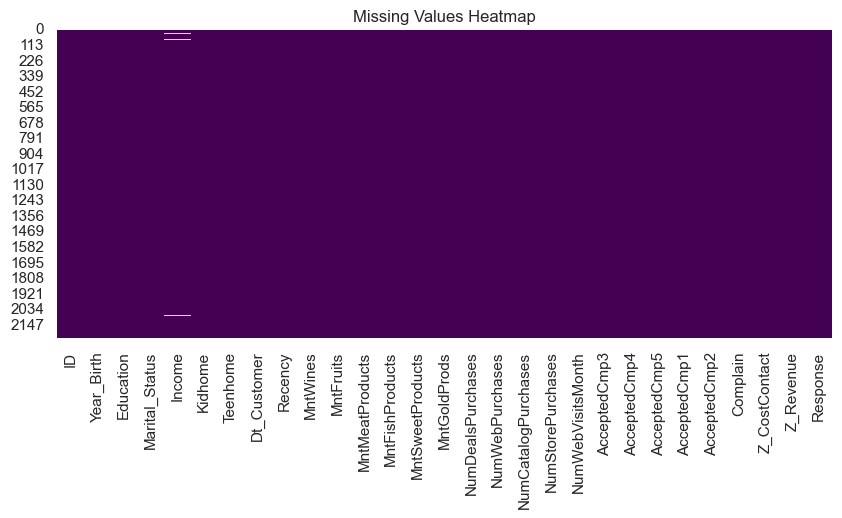

In [3]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [5]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent.round(2)})
print("\nMissing Values Summary:\n")
display(missing_df)



Missing Values Summary:



Missing Values  Percentage (%)
Income              24            1.07

Variable Type Summary

In [6]:
# Summary of variable types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = [col for col in df.columns if 'Dt_' in col or 'date' in col.lower()]

print(f"Total Columns: {df.shape[1]}")
print(f"Numeric Columns: {len(num_cols)} → {num_cols}")
print(f"Categorical Columns: {len(cat_cols)} → {cat_cols}")
print(f"Date Columns: {len(date_cols)} → {date_cols}")


Total Columns: 29
Numeric Columns: 26 → ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical Columns: 3 → ['Education', 'Marital_Status', 'Dt_Customer']
Date Columns: 1 → ['Dt_Customer']


Numeric Distribution

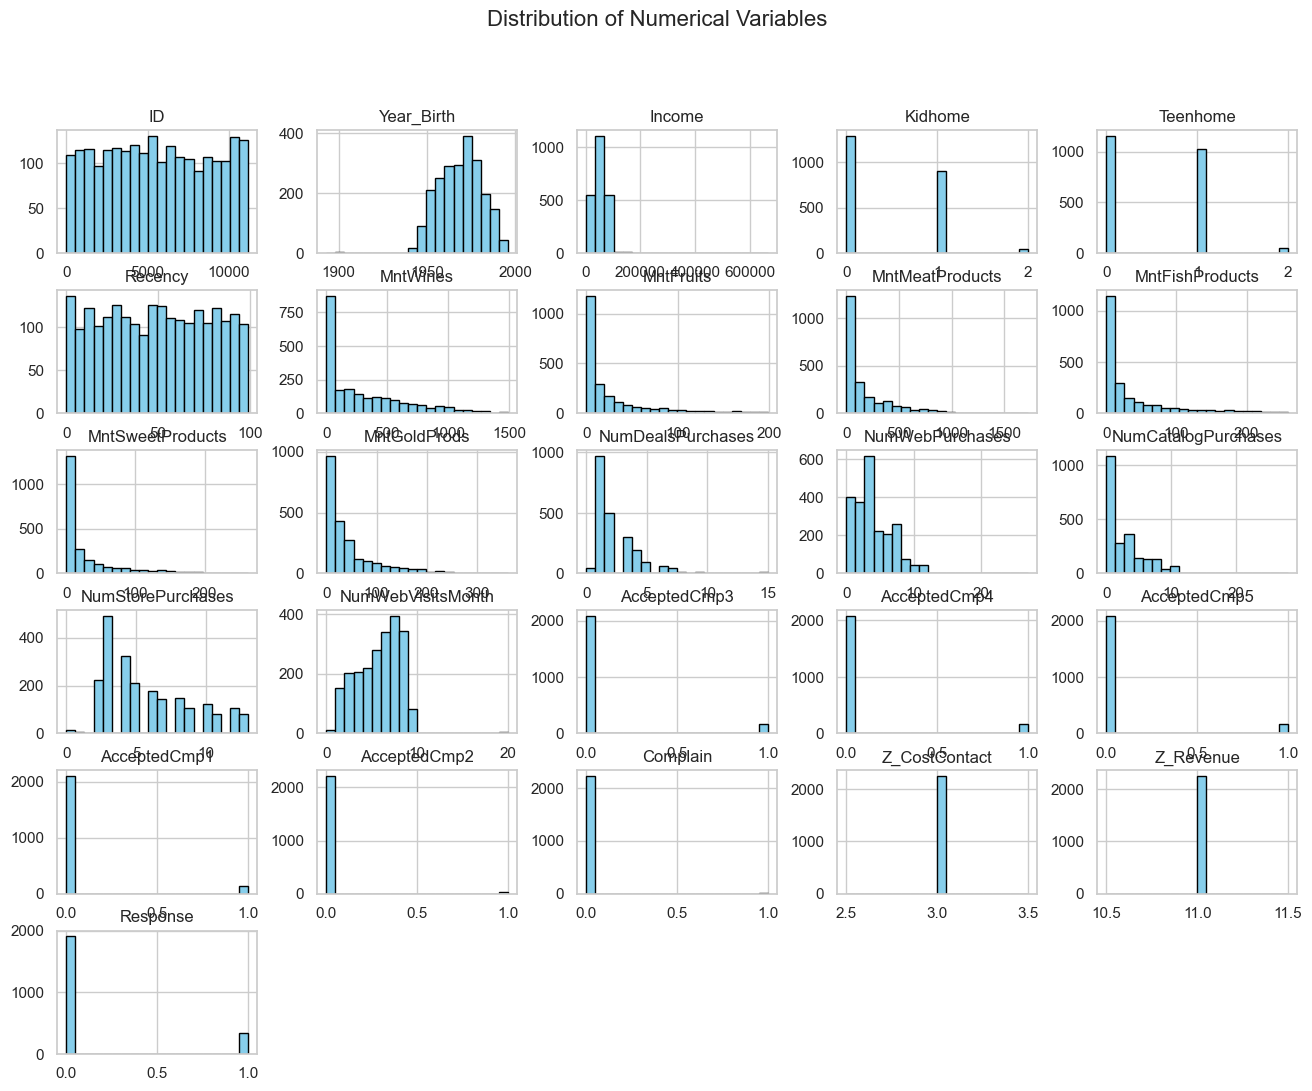

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

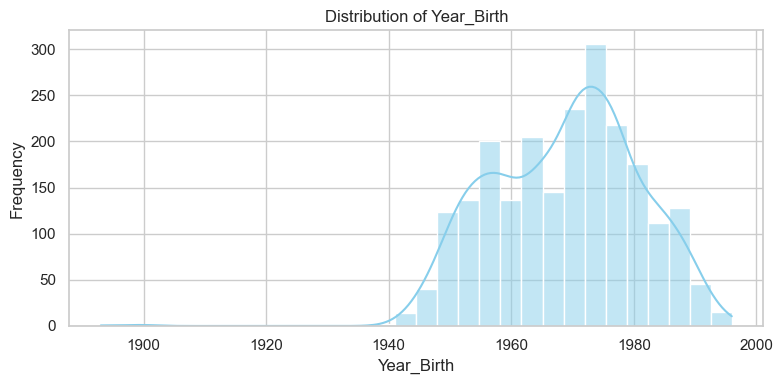

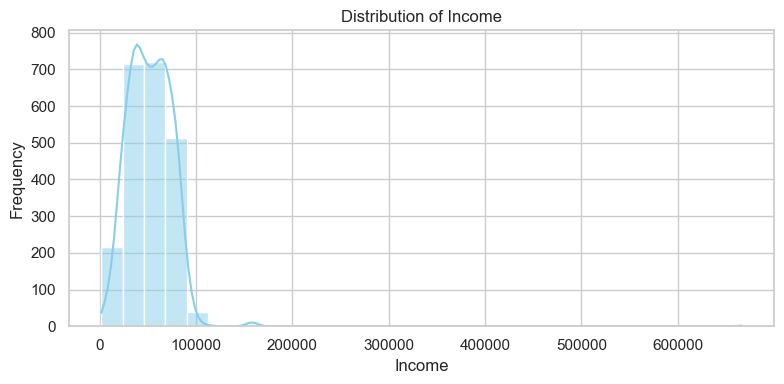

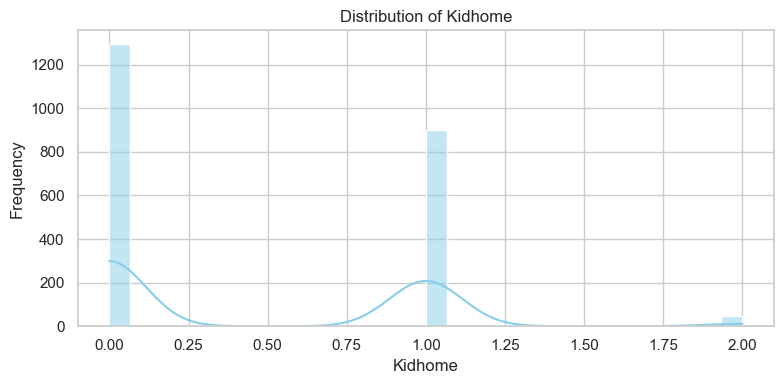

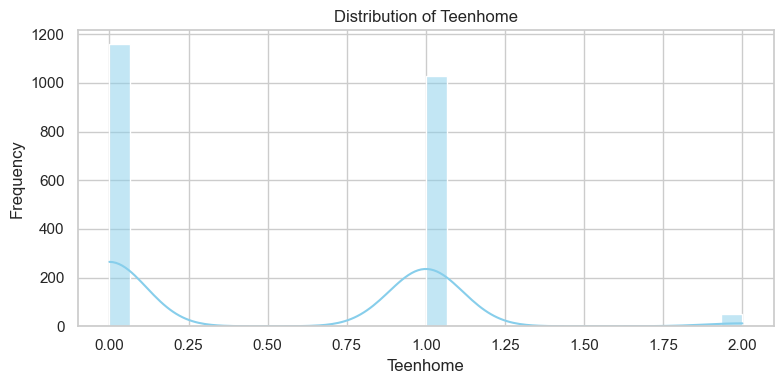

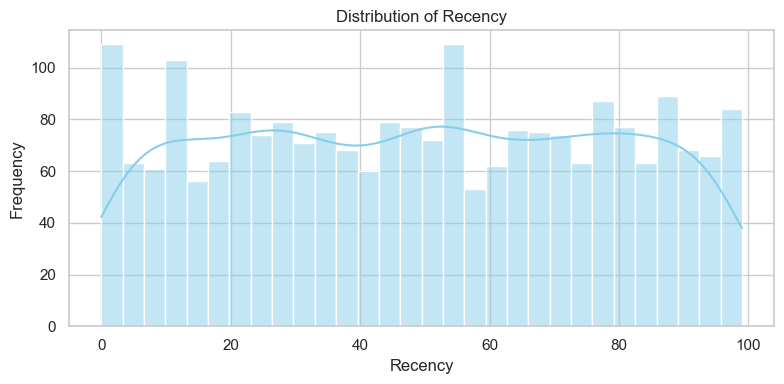

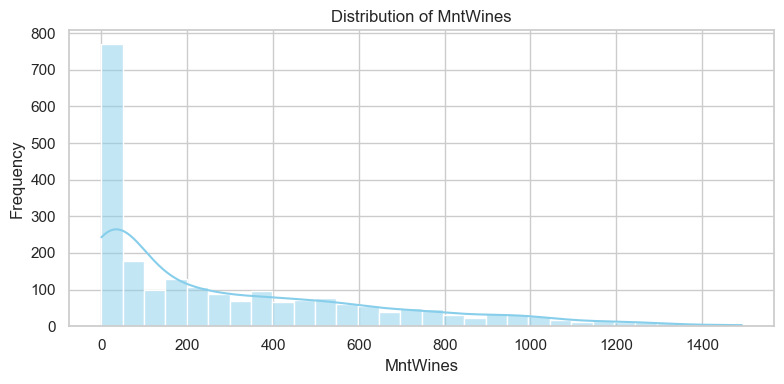

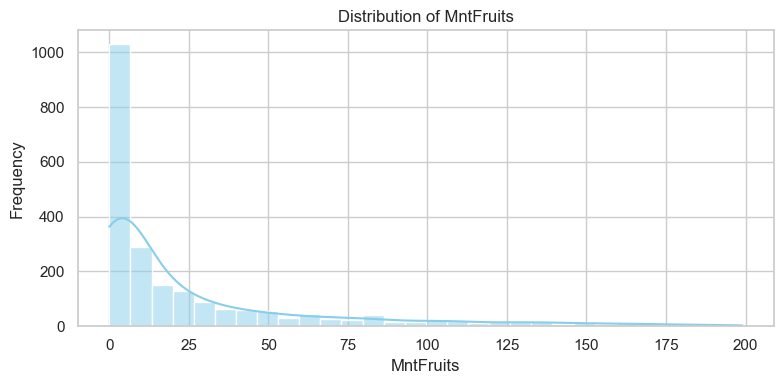

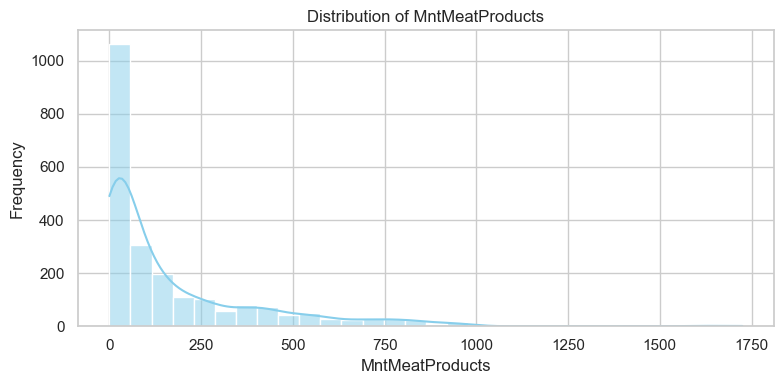

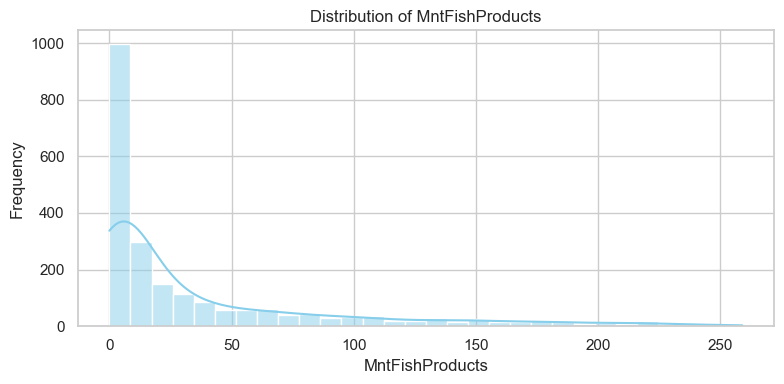

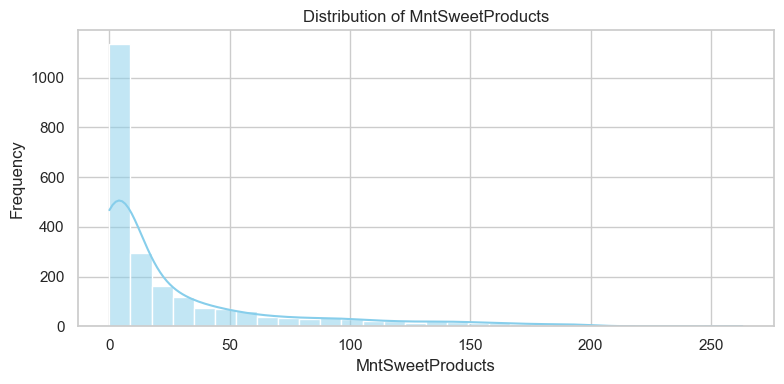

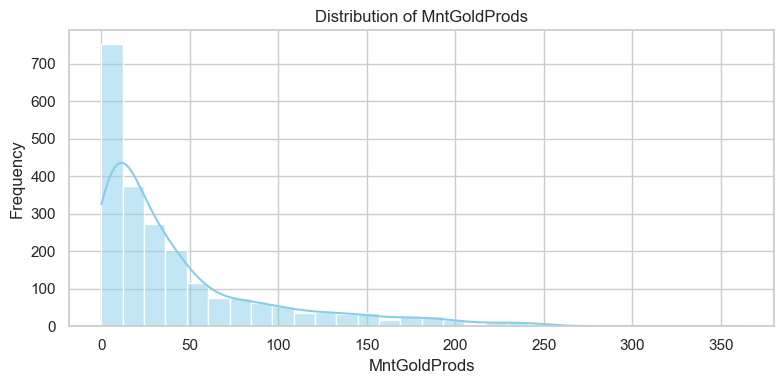

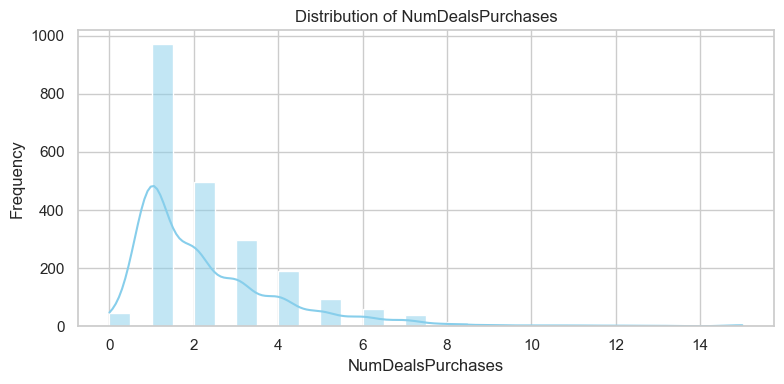

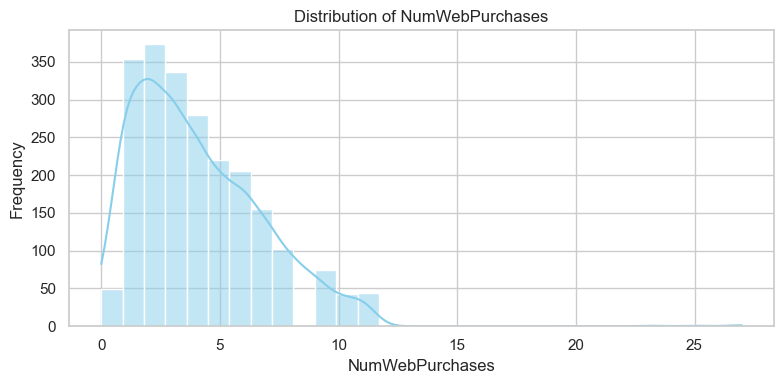

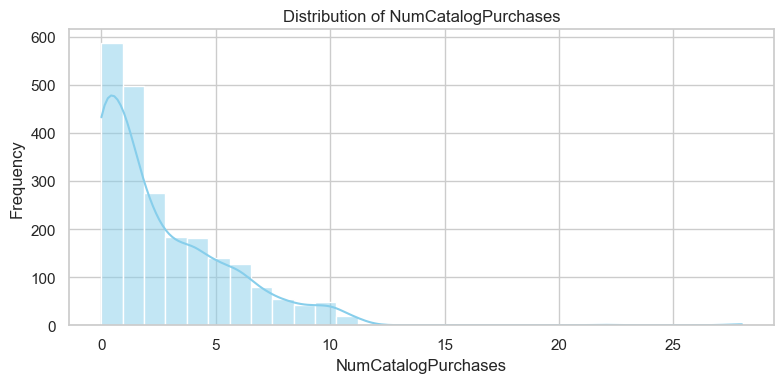

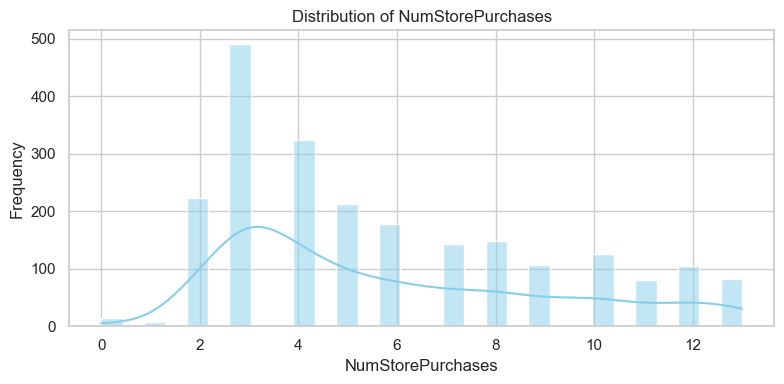

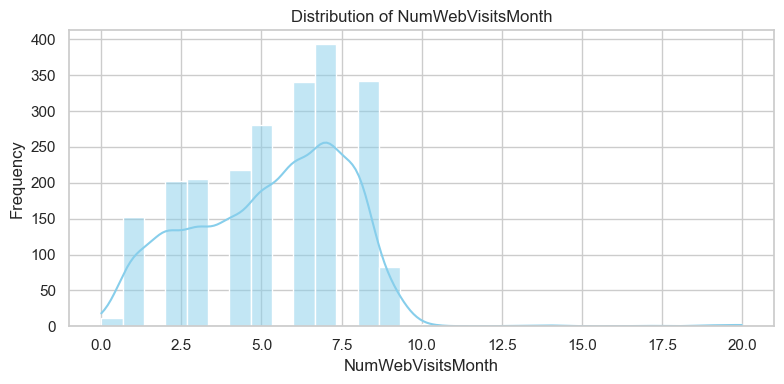

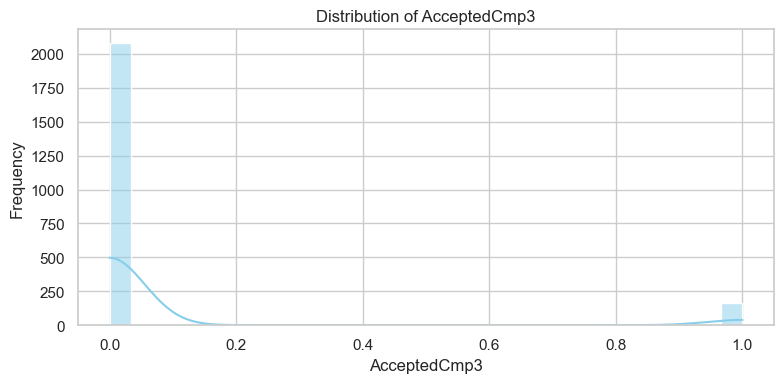

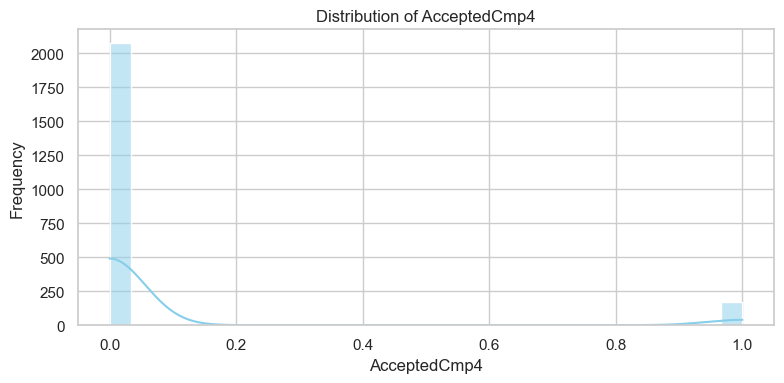

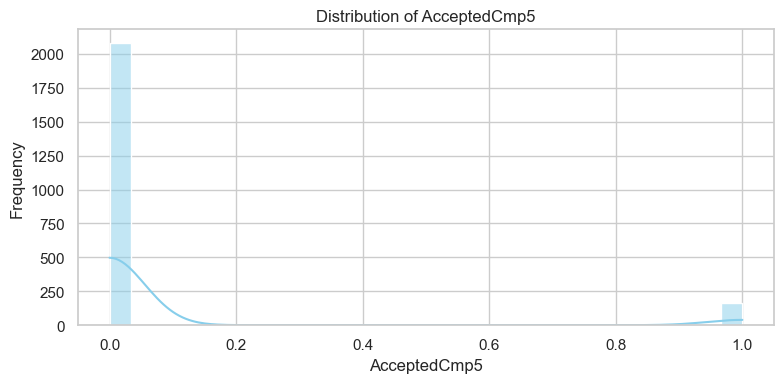

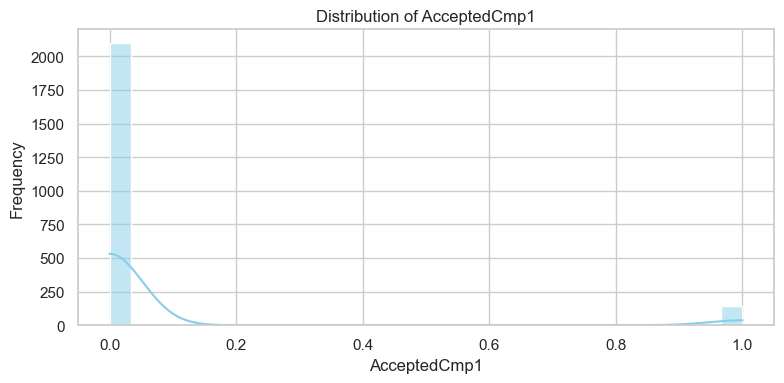

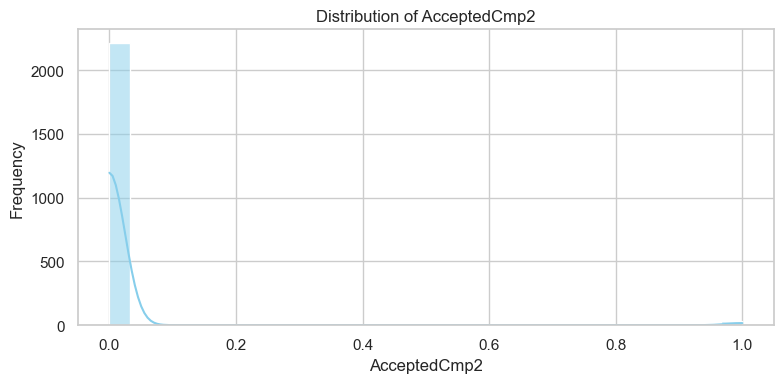

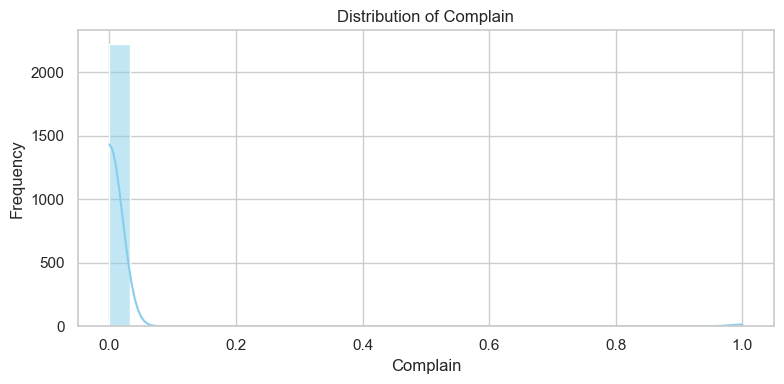

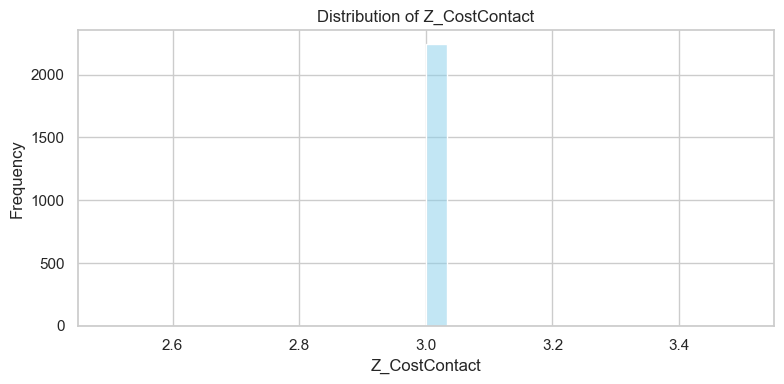

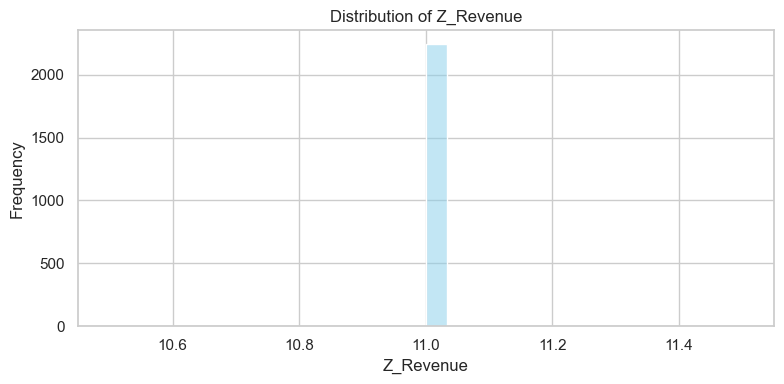

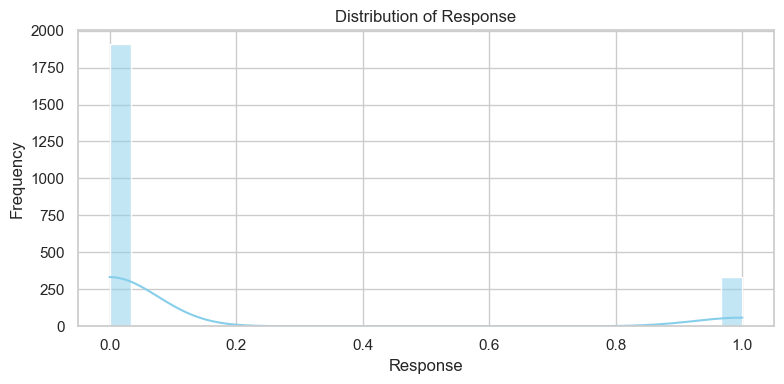

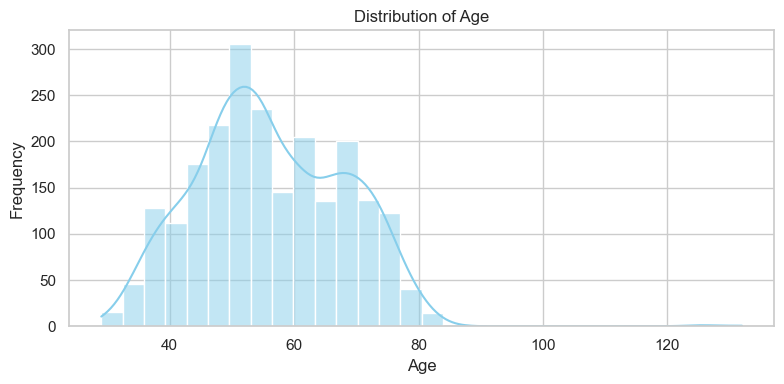

In [11]:
# Separate clear histogram plots for each numerical column (with better spacing)
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['ID'])  # Drop ID for now
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


Boxplots for Age & Income

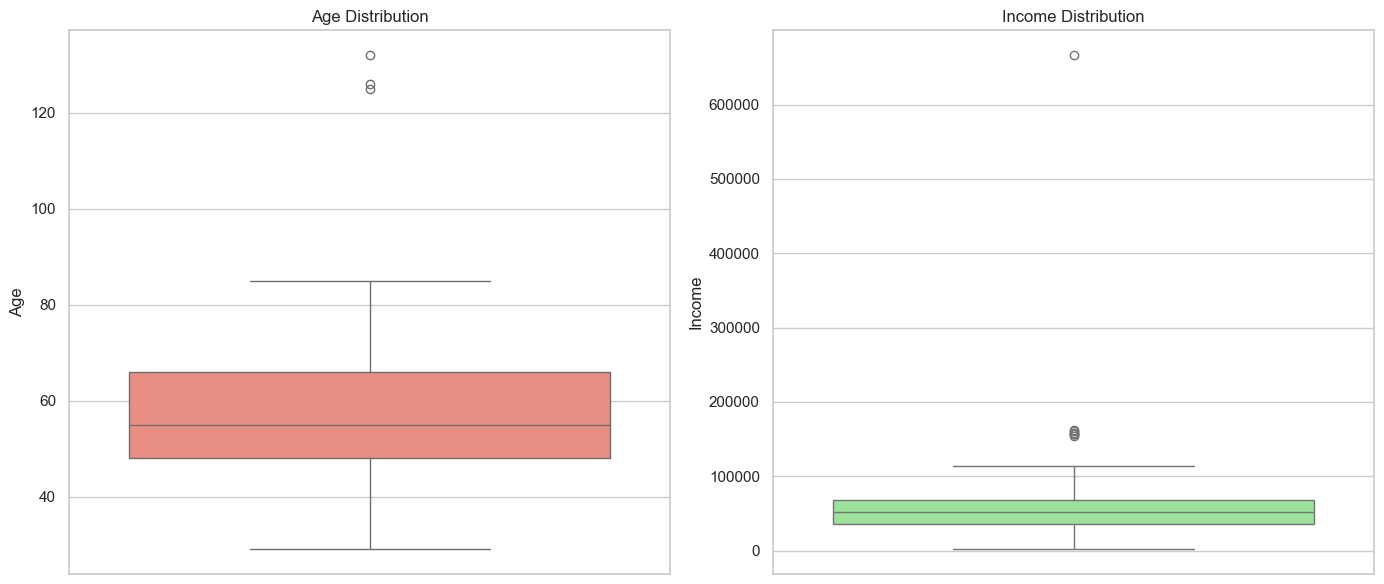

In [8]:
df['Age'] = 2025 - df['Year_Birth']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df['Age'], ax=axs[0], color='salmon')
axs[0].set_title("Age Distribution")

sns.boxplot(y=df['Income'], ax=axs[1], color='lightgreen')
axs[1].set_title("Income Distribution")
plt.tight_layout()
plt.show()

Categorical plots

C:\Users\priya\AppData\Local\Temp\ipykernel_32744\1504984898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


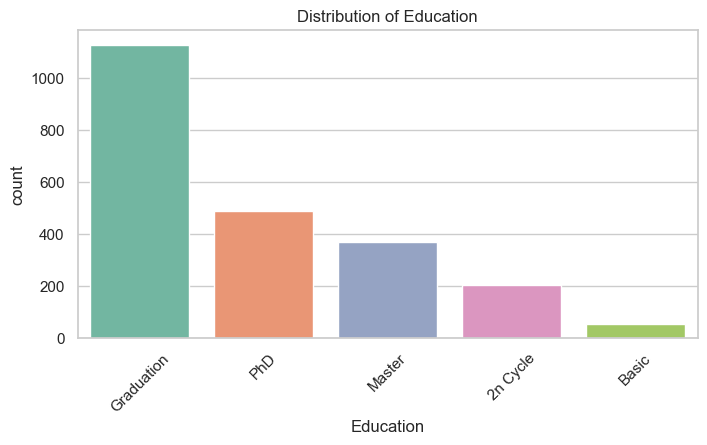

C:\Users\priya\AppData\Local\Temp\ipykernel_32744\1504984898.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


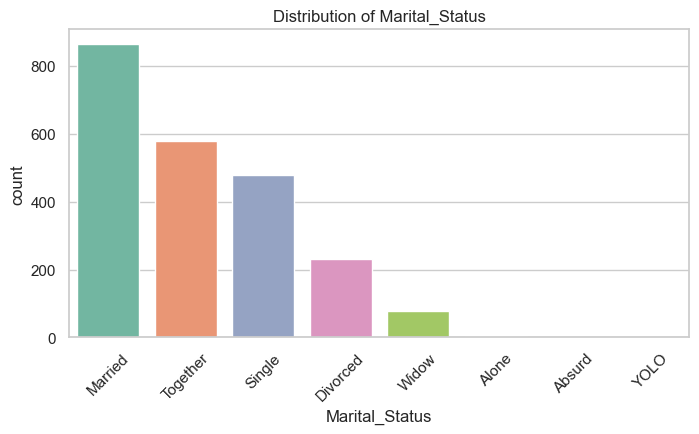

In [9]:
cat_cols = ['Education', 'Marital_Status']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

Correlation Heatmap

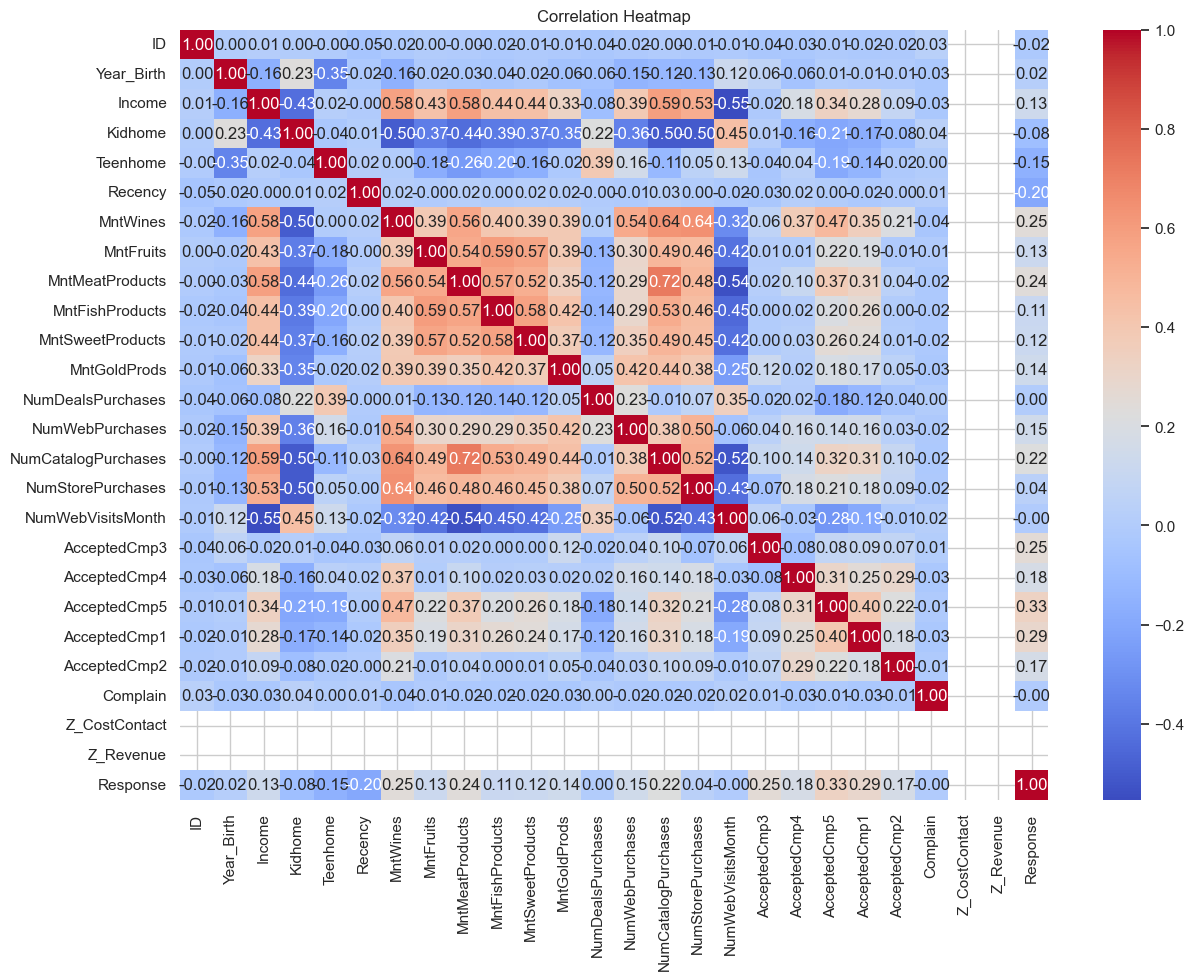

In [10]:
plt.figure(figsize=(14, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Pairplot of Key Variables

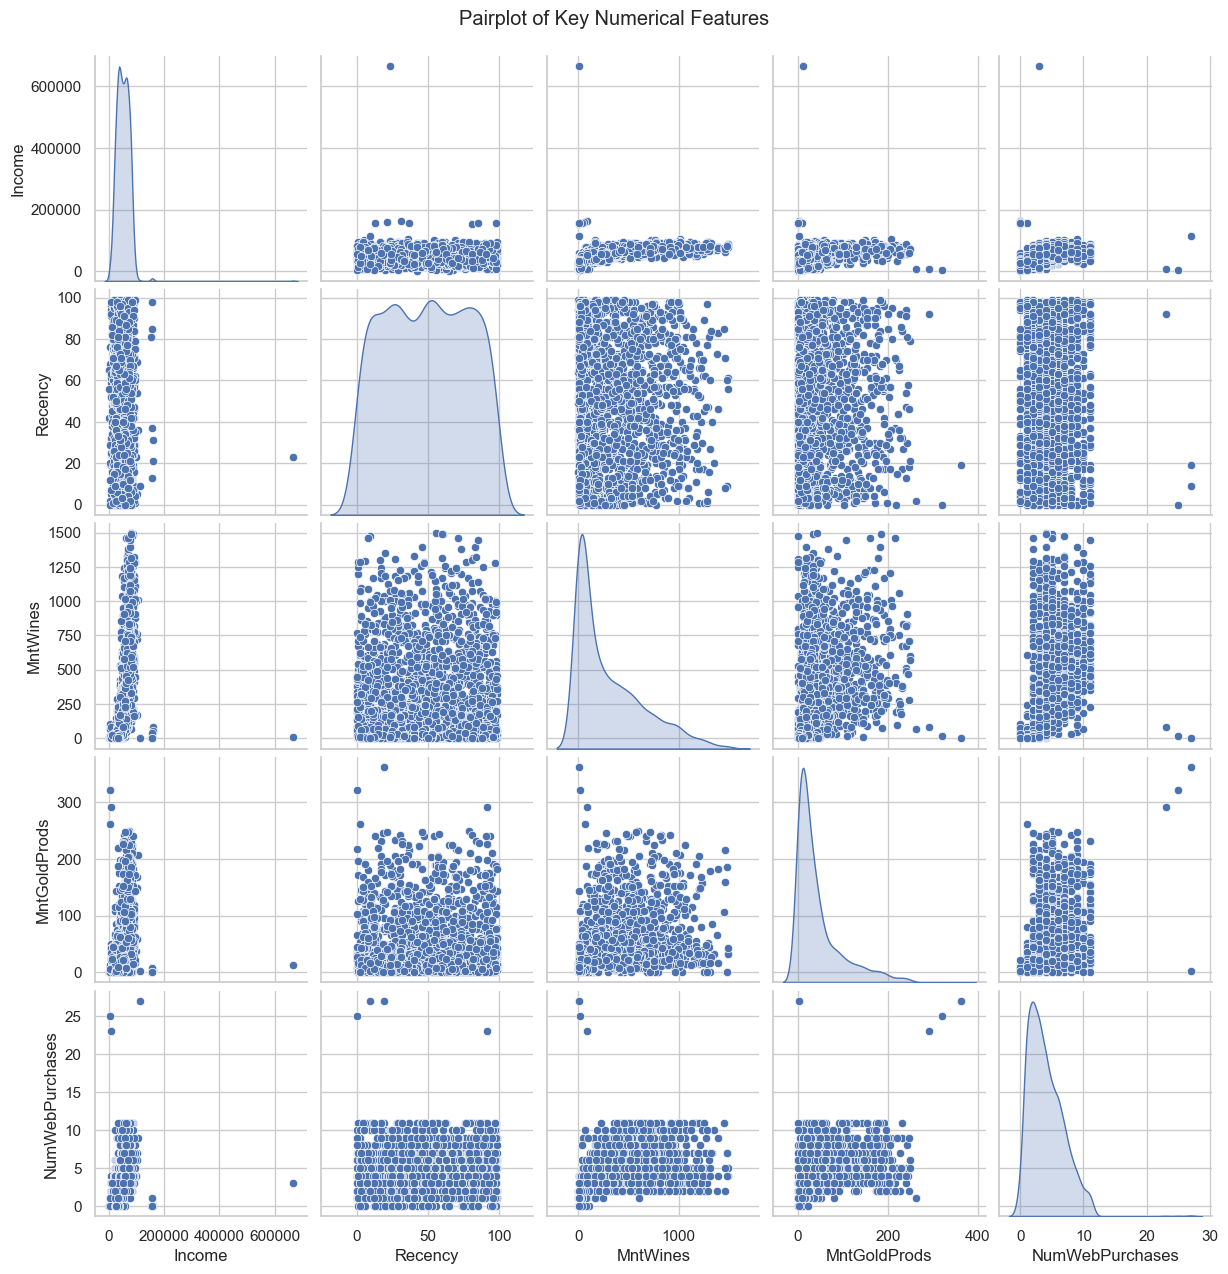

In [12]:
# Pairplot to observe relationships and natural separations
sns.pairplot(df[['Income', 'Recency', 'MntWines', 'MntGoldProds', 'NumWebPurchases']], diag_kind='kde')
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()


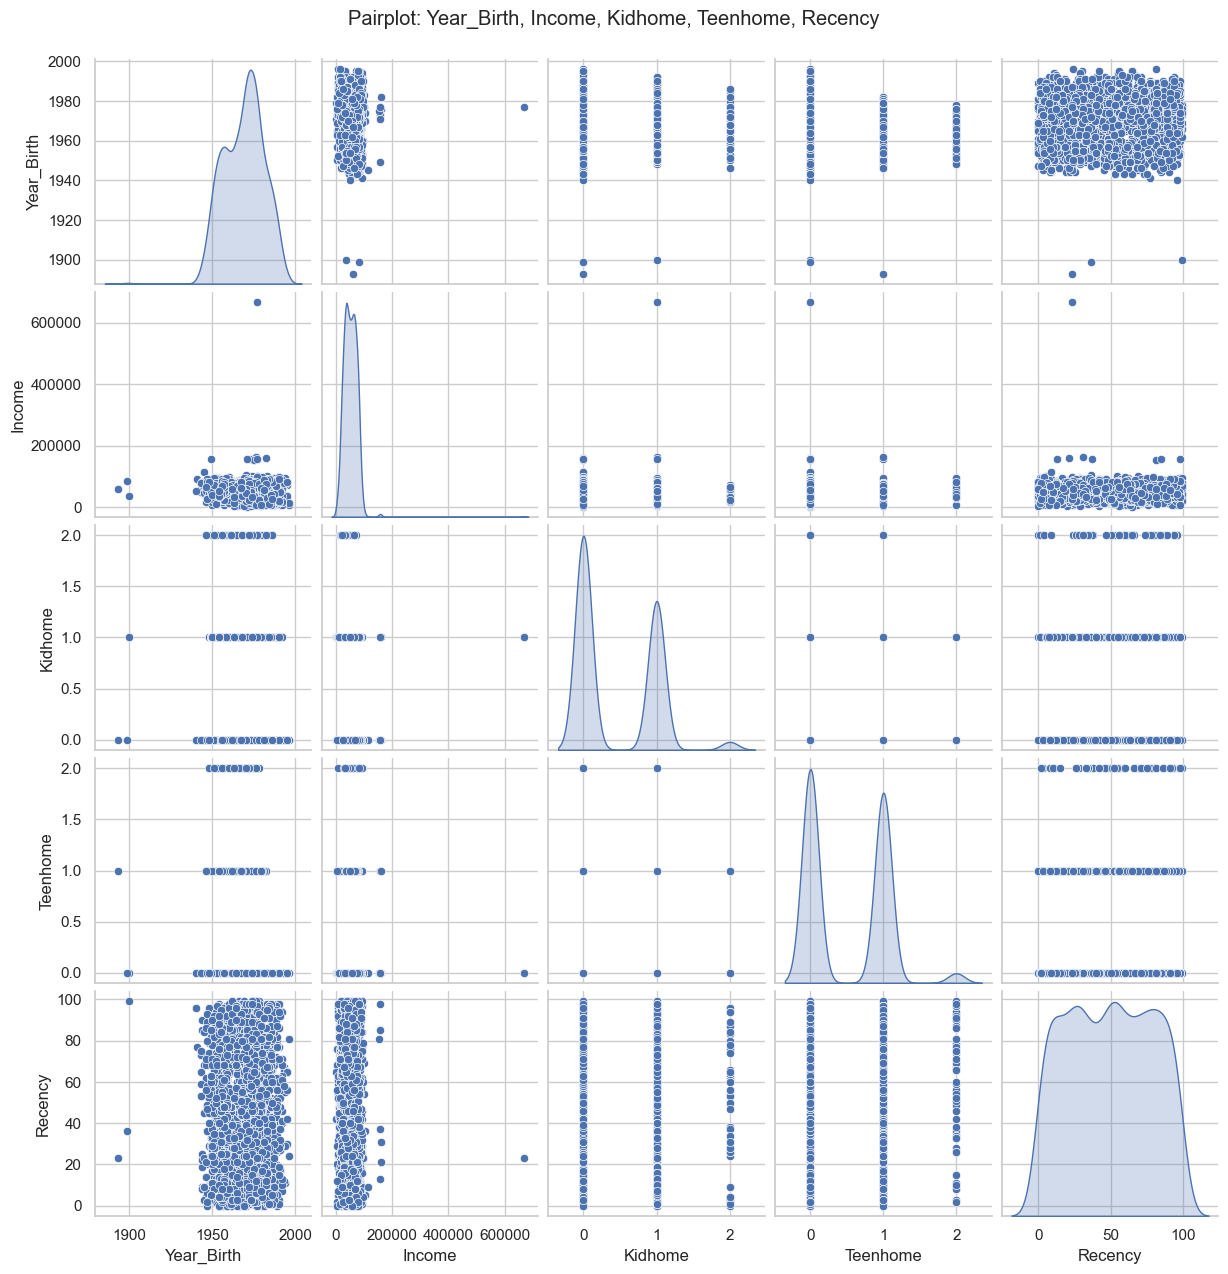

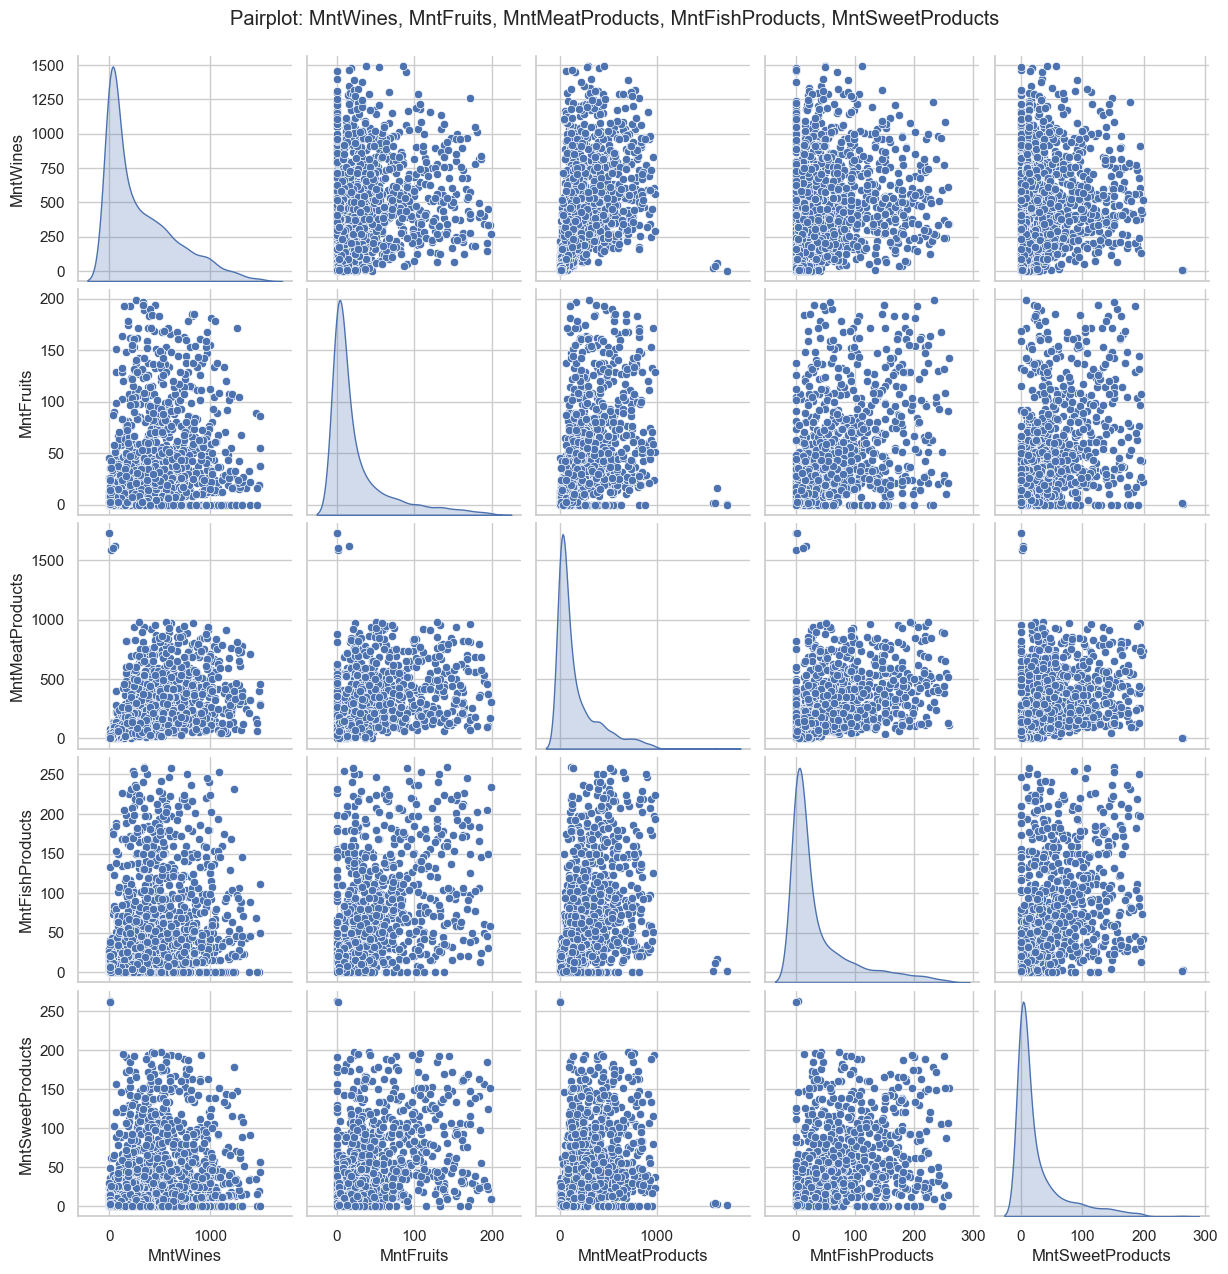

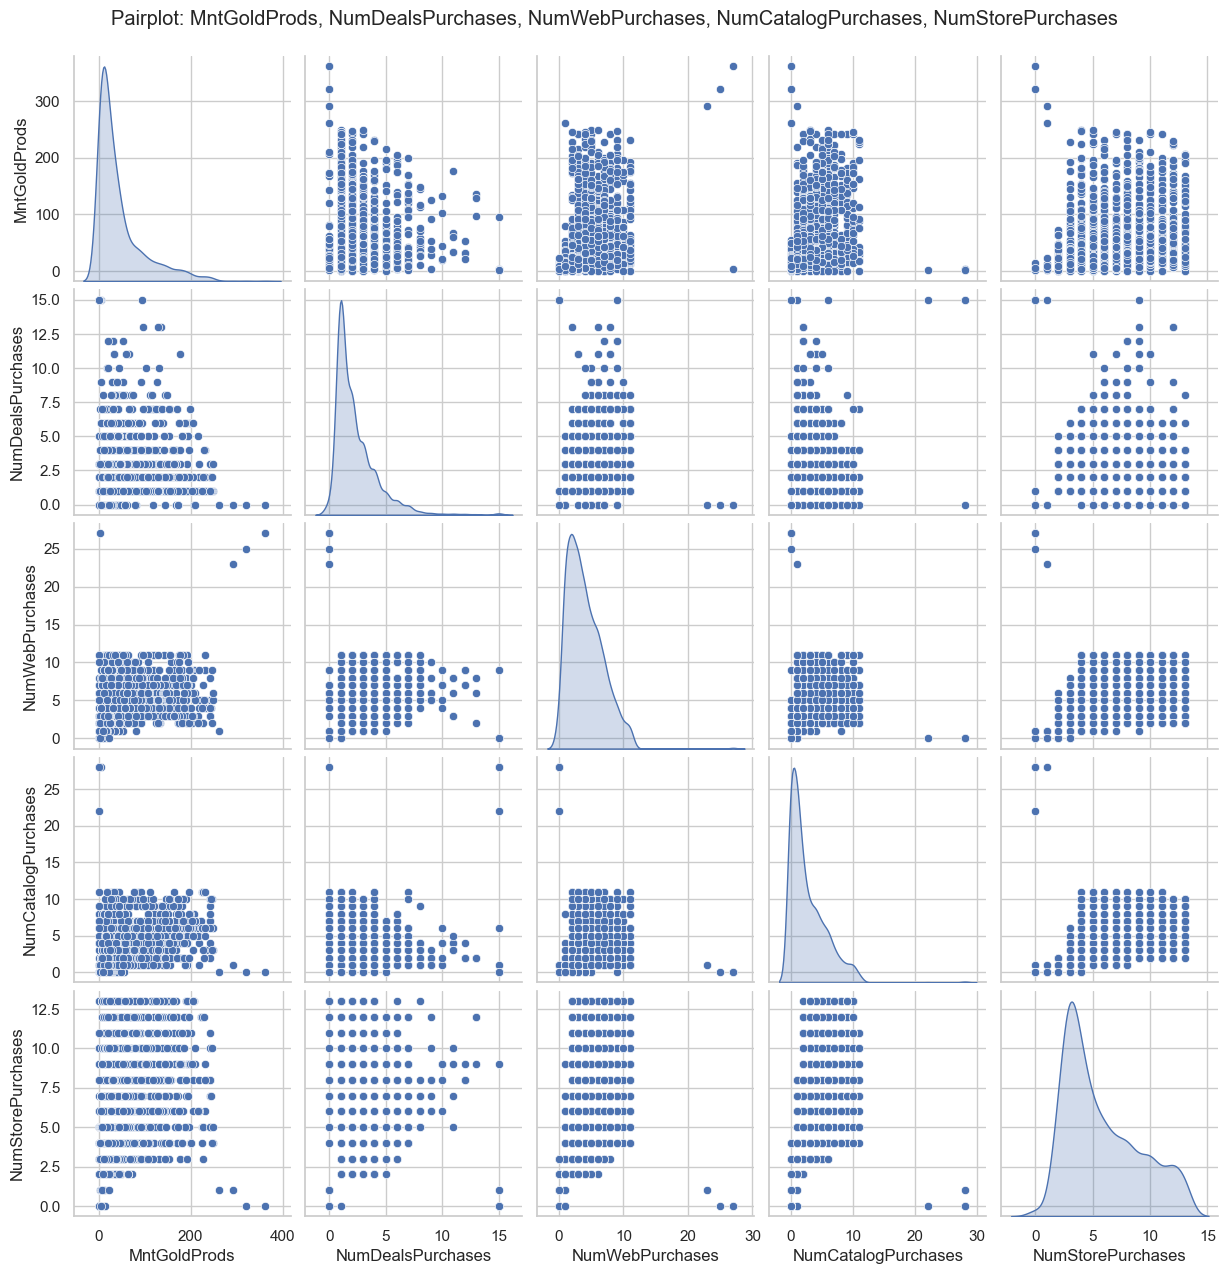

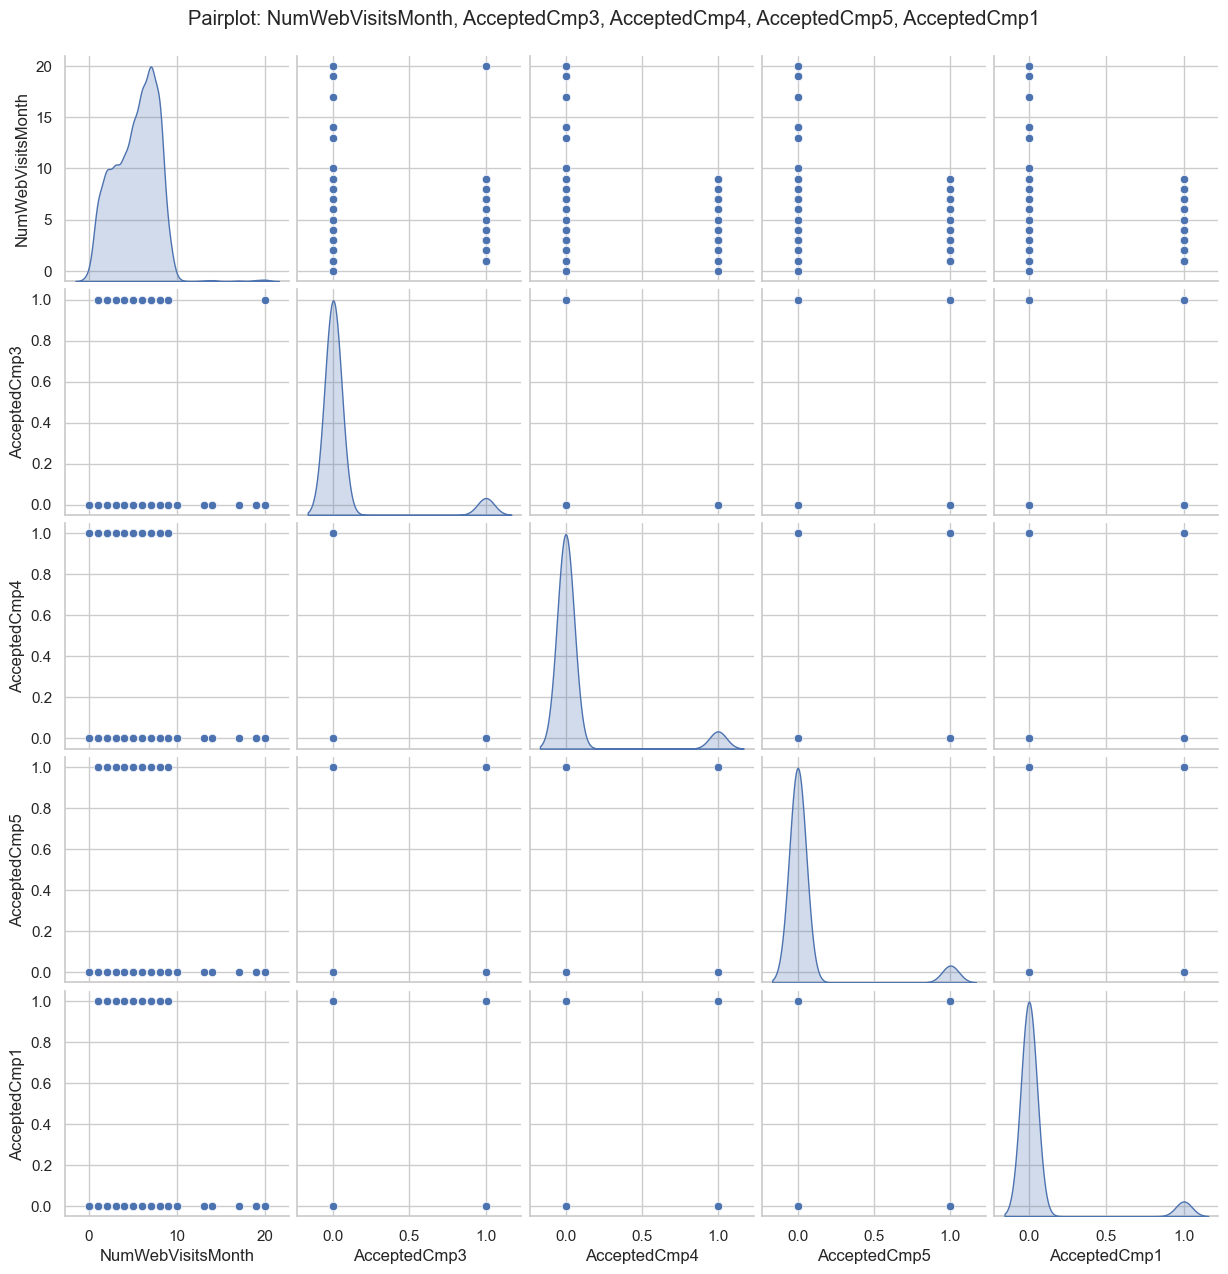

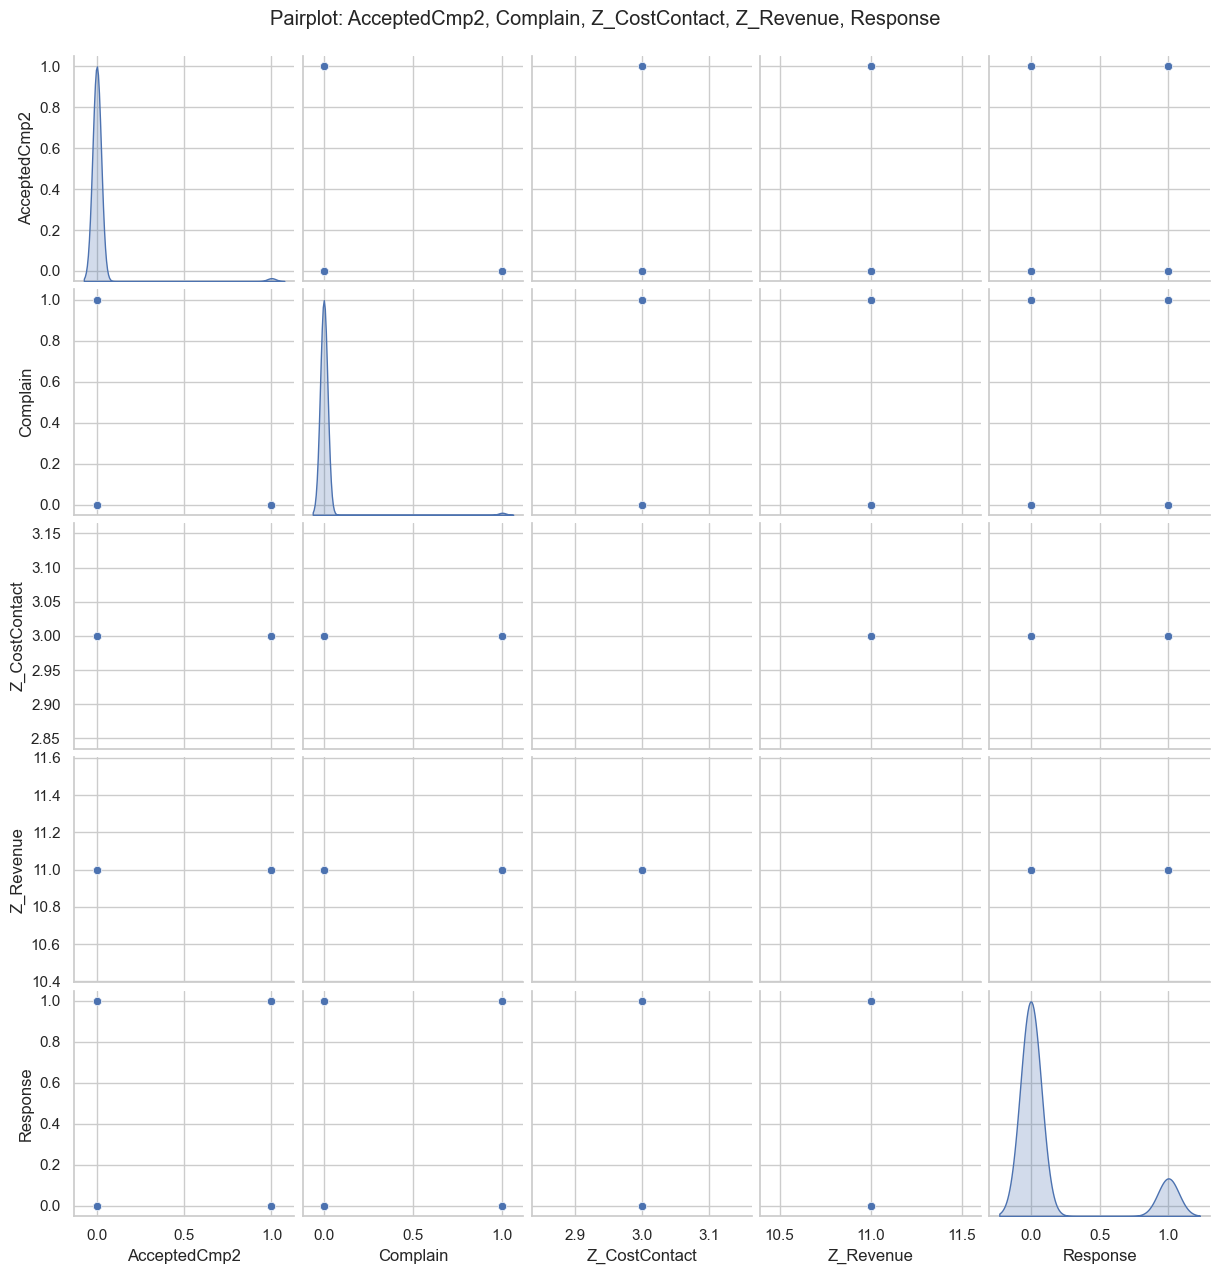

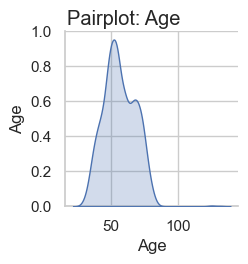

In [14]:
import itertools

# Break numeric features into groups of 5 for separate pairplots
num_cols = df.select_dtypes(include=['int64', 'float64']).drop(['ID'], axis=1).columns.tolist()

for i in range(0, len(num_cols), 5):
    sub_cols = num_cols[i:i+5]
    sns.pairplot(df[sub_cols], diag_kind='kde')
    plt.suptitle(f"Pairplot: {', '.join(sub_cols)}", y=1.02)
    plt.show()


### Data Preprocessing

Handling Missing Values in Income

In [21]:
# Reload the dataset to get Year_Birth back
df = pd.read_csv('customer_segmentation.csv')


In [22]:
# Fill missing income with median
df['Income'] = df['Income'].fillna(df['Income'].median())


 Feature Engineering: Create New Features: Age, Children, Total_Spent and Drop other features

In [23]:
# Create Age
df['Age'] = 2025 - df['Year_Birth']

# Create Children
df['Children'] = df['Kidhome'] + df['Teenhome']

# Create Total_Spent
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spent'] = df[spend_cols].sum(axis=1)


In [24]:
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 
              'Year_Birth', 'Kidhome', 'Teenhome'], axis=1)


Clean Categorical Variables

In [25]:
# Group rare categories into 'Other'
df['Marital_Status'] = df['Marital_Status'].replace({
    'YOLO': 'Other',
    'Absurd': 'Other',
    'Alone': 'Other'
})


One-Hot Encode Categorical Columns

In [26]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


Scale the Dataset

In [27]:
from sklearn.preprocessing import StandardScaler

# Standardize all features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


 Final Check

In [28]:
df_scaled.head()


Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.235696  0.307039  0.983781   1.551577         1.679702         2.462147   
1 -0.235454 -0.383664 -0.870479  -0.636301        -0.713225        -0.650449   
2  0.773999 -0.798086  0.362723   0.570804        -0.177032         1.345274   
3 -1.022355 -0.798086 -0.870479  -0.560857        -0.651187        -0.503974   
4  0.241888  1.550305 -0.389085   0.419916        -0.216914         0.155164   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  ...  \
0          1.476500      0.843207           0.349414         1.409304  ...   
1         -0.631503     -0.729006          -0.168236        -1.110409  ...   
2         -0.146905     -0.038766          -0.685887         1.409304  ...   
3         -0.583043     -0.748179          -0.168236        -0.750450  ...   
4         -0.001525     -0.556446           1.384715         0.329427  ...   

   Total_Spent  Education_Basic  Education_Graduation  Education_Master  \
0     1.679417        -0.157171              0.993769         -0.444816   
1    -0.961275        -0.157171              0.993769         -0.444816   
2     0.282673        -0.157171              0.993769         -0.444816   
3    -0.918094        -0.157171              0.993769         -0.444816   
4    -0.305254        -0.157171             -1.006270         -0.444816   

   Education_PhD  Marital_Status_Married  Marital_Status_Other  \
0      -0.526385               -0.792406             -0.055989   
1      -0.526385               -0.792406             -0.055989   
2      -0.526385               -0.792406             -0.055989   
3      -0.526385               -0.792406             -0.055989   
4       1.899751                1.261980             -0.055989   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  
0               1.914854                -0.591099             -0.188676  
1               1.914854                -0.591099             -0.188676  
2              -0.522233                 1.691765             -0.188676  
3              -0.522233                 1.691765             -0.188676  
4              -0.522233                -0.591099             -0.188676  

[5 rows x 32 columns]

In [29]:
# Recalculate Age if needed
if 'Year_Birth' in df.columns:
    df['Age'] = 2025 - df['Year_Birth']

# Confirm Age is in the DataFrame
print("Age" in df.columns)

# Re-encode with Age
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)

# Scale again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)


True


In [30]:
print("Final Columns:", df_scaled.columns.tolist())


Final Columns: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Children', 'Total_Spent', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Other', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


### Kmeans Model Development

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd


In [32]:
# Initialize lists to store results
wcss = []
silhouette = []
calinski = []
davies = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_scaled, cluster_labels))
    calinski.append(calinski_harabasz_score(df_scaled, cluster_labels))
    davies.append(davies_bouldin_score(df_scaled, cluster_labels))


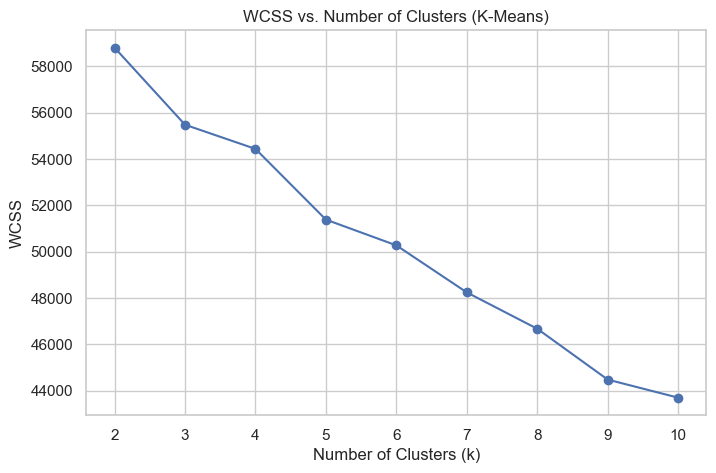

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('WCSS vs. Number of Clusters (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


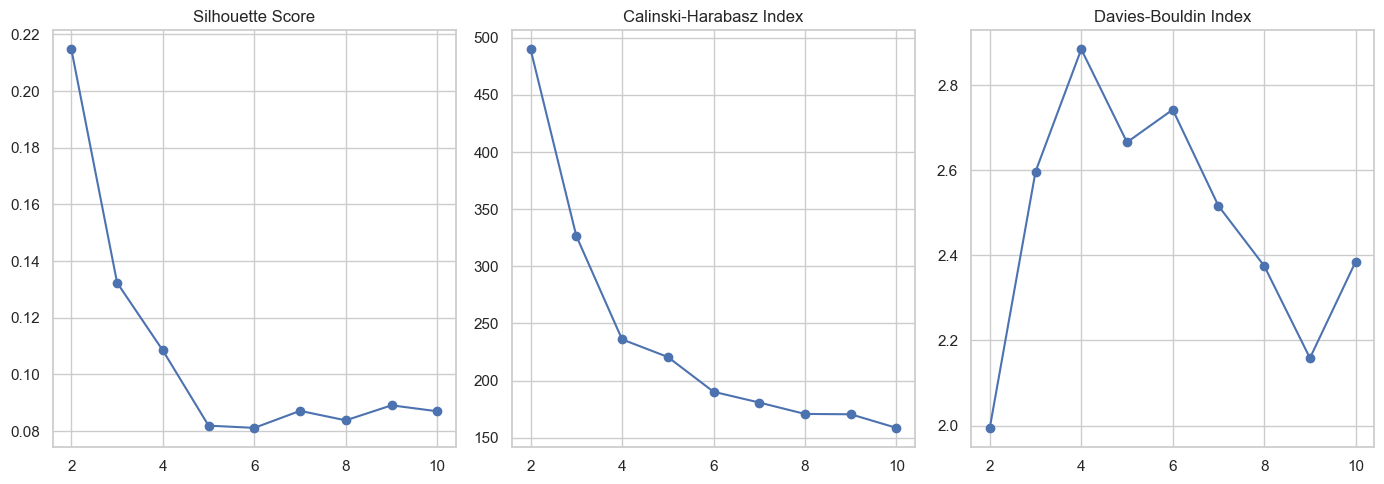

In [34]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), calinski, marker='o')
plt.title('Calinski-Harabasz Index')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies, marker='o')
plt.title('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


In [35]:
results = pd.DataFrame({
    'K': range(2, 11),
    'WCSS': wcss,
    'Silhouette': silhouette,
    'Calinski-Harabasz': calinski,
    'Davies-Bouldin': davies
})

results


K          WCSS  Silhouette  Calinski-Harabasz  Davies-Bouldin
0   2  58806.021917    0.214755         489.949192        1.994479
1   3  55480.631416    0.132339         326.582328        2.596610
2   4  54437.087265    0.108434         236.083859        2.884197
3   5  51385.227467    0.081893         220.680237        2.665654
4   6  50273.555790    0.081109         190.247121        2.742319
5   7  48243.215580    0.087115         180.800343        2.515969
6   8  46673.913412    0.083767         170.831386        2.375066
7   9  44480.148547    0.089069         170.533571        2.158515
8  10  43700.888134    0.086970         158.637558        2.385395

In [37]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Save KMeans results using best_k
kmeans = KMeans(n_clusters=int(best_k), random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

kmeans_metrics = {
    'Model': 'KMeans',
    'WCSS': kmeans.inertia_,
    'Silhouette': silhouette_score(df_scaled, kmeans_labels),
    'Calinski-Harabasz': calinski_harabasz_score(df_scaled, kmeans_labels),
    'Davies-Bouldin': davies_bouldin_score(df_scaled, kmeans_labels)
}


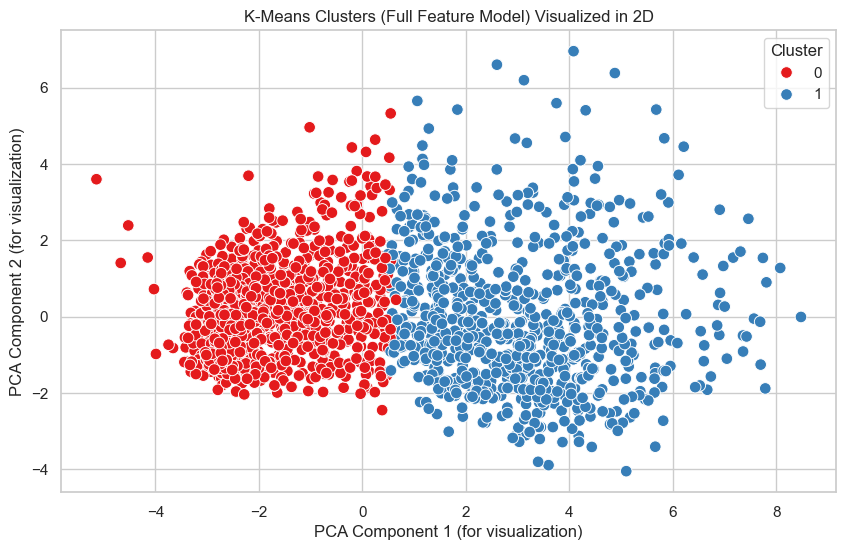

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Only reduce for plotting
pca_viz = PCA(n_components=2)
visual_2d = pca_viz.fit_transform(df_scaled)

# Use existing KMeans labels (clustered on full data)
plot_df = pd.DataFrame(visual_2d, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = kmeans_labels  # From full-data KMeans

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=70)
plt.title("K-Means Clusters (Full Feature Model) Visualized in 2D")
plt.xlabel("PCA Component 1 (for visualization)")
plt.ylabel("PCA Component 2 (for visualization)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [40]:
df_kmeans_labeled = df_scaled.copy()
df_kmeans_labeled['Cluster'] = cluster_labels


In [44]:
# Label original data with the correct 2-cluster result
df_kmeans_labeled = df_scaled.copy()
df_kmeans_labeled['Cluster'] = kmeans_labels  # labels from KMeans(k=2)

# Group by cluster and calculate means
cluster_summary_k2 = df_kmeans_labeled.groupby('Cluster').mean()

# Transpose for better viewing
cluster_summary_k2.T


Cluster                         0         1
Income                  -0.503607  0.818877
Recency                 -0.013139  0.021365
MntWines                -0.571521  0.929307
MntFruits               -0.482313  0.784253
MntMeatProducts         -0.564550  0.917973
MntFishProducts         -0.498905  0.811232
MntSweetProducts        -0.482228  0.784115
MntGoldProds            -0.382172  0.621421
NumDealsPurchases        0.113915 -0.185228
NumWebPurchases         -0.367134  0.596970
NumCatalogPurchases     -0.584755  0.950827
NumStorePurchases       -0.534148  0.868538
NumWebVisitsMonth        0.426445 -0.693411
AcceptedCmp3            -0.019232  0.031272
AcceptedCmp4            -0.146589  0.238358
AcceptedCmp5            -0.280140  0.455515
AcceptedCmp1            -0.241534  0.392740
AcceptedCmp2            -0.097694  0.158853
Complain                 0.007458 -0.012127
Response                -0.151428  0.246226
Age                     -0.084266  0.137019
Children                 0.390143 -0.634382
Total_Spent             -0.674275  1.096388
Education_Basic          0.091959 -0.149528
Education_Graduation    -0.037253  0.060574
Education_Master         0.028924 -0.047031
Education_PhD           -0.029613  0.048151
Marital_Status_Married   0.020758 -0.033752
Marital_Status_Other     0.008598 -0.013981
Marital_Status_Single   -0.000377  0.000612
Marital_Status_Together  0.004717 -0.007670
Marital_Status_Widow    -0.034342  0.055841

### Hierarchical (Agglomerative) Clustering

In [46]:
import numpy as np

def compute_wcss(X, labels):
    wcss = 0
    for label in np.unique(labels):
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        wcss += ((cluster_points - centroid) ** 2).sum()
    return wcss


In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

agg_wcss = []
agg_silhouette = []
agg_calinski = []
agg_davies = []
k_range = range(2, 11)

for k in k_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(df_scaled)

    agg_wcss.append(compute_wcss(df_scaled.values, labels))
    agg_silhouette.append(silhouette_score(df_scaled, labels))
    agg_calinski.append(calinski_harabasz_score(df_scaled, labels))
    agg_davies.append(davies_bouldin_score(df_scaled, labels))


In [48]:
# Create and display results as a clean DataFrame
import pandas as pd

agg_results = pd.DataFrame({
    'K': list(range(2, 11)),
    'WCSS': agg_wcss,
    'Silhouette': agg_silhouette,
    'Calinski-Harabasz': agg_calinski,
    'Davies-Bouldin': agg_davies
})

# Set K as index for readability
agg_results.set_index('K', inplace=True)

# Display the result
display(agg_results)


WCSS  Silhouette  Calinski-Harabasz  Davies-Bouldin
K                                                              
2   61743.693403    0.143360         360.157498        2.281627
3   58207.263195    0.108614         258.889618        2.919040
4   55668.266043    0.117185         214.378494        2.435710
5   53322.912811    0.130171         192.356755        2.148768
6   51051.556861    0.128945         180.538831        1.862665
7   48791.411718    0.137263         174.587480        1.713482
8   46564.801952    0.138325         171.978833        1.665016
9   44761.471794    0.145857         167.709064        1.671279
10  43002.982738    0.148104         165.233367        1.746453

In [49]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with k=10
agglo_10 = AgglomerativeClustering(n_clusters=10)
agglo_labels = agglo_10.fit_predict(df_scaled)

# Add cluster labels to the dataset
df_agglo_labeled = df_scaled.copy()
df_agglo_labeled['Cluster'] = agglo_labels


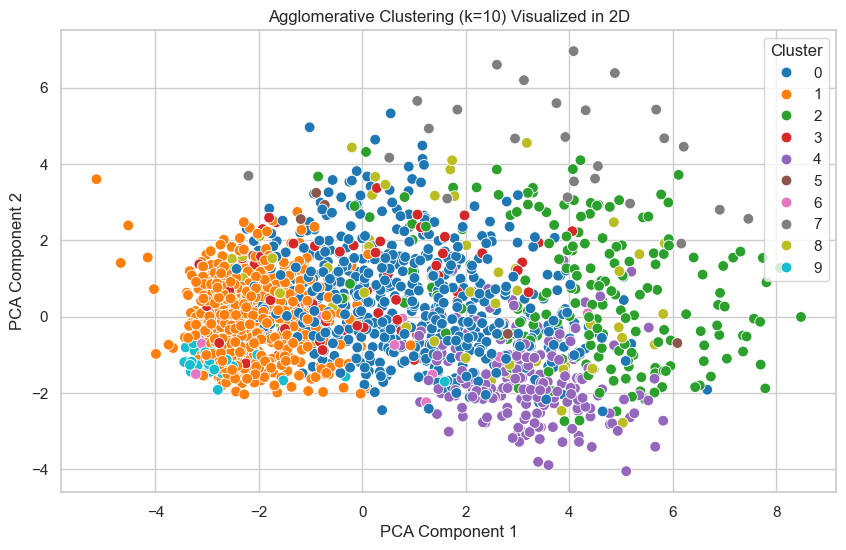

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reduce to 2D for plotting
pca_viz = PCA(n_components=2)
pca_data = pca_viz.fit_transform(df_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = agglo_labels

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title('Agglomerative Clustering (k=10) Visualized in 2D')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [51]:
# Group by cluster and calculate feature means
cluster_summary_agglo = df_agglo_labeled.groupby('Cluster').mean().T
cluster_summary_agglo


Cluster                         0         1         2         3         4  \
Income                   0.343779 -0.639253  1.078222 -0.392749  0.969822   
Recency                  0.024338  0.040609 -0.030841 -0.220026 -0.083522   
MntWines                 0.487543 -0.755143  1.413531 -0.139723  0.377567   
MntFruits                0.115036 -0.526117  0.817932 -0.348862  1.254373   
MntMeatProducts          0.133751 -0.619310  1.323000 -0.374828  1.179605   
MntFishProducts          0.057778 -0.548928  0.892293 -0.333372  1.387636   
MntSweetProducts         0.111625 -0.531277  0.905816 -0.382637  1.175939   
MntGoldProds             0.296982 -0.563373  0.611099  0.232528  0.727993   
NumDealsPurchases        0.461406 -0.101648 -0.541542  0.117197 -0.358826   
NumWebPurchases          0.660543 -0.663480  0.580360  0.077119  0.324518   
NumCatalogPurchases      0.277954 -0.724116  1.084597  0.042086  1.112623   
NumStorePurchases        0.638972 -0.736282  0.719834 -0.476024  0.802965   
NumWebVisitsMonth       -0.109986  0.454155 -0.899344  0.551373 -1.057877   
AcceptedCmp3            -0.280140 -0.275834  0.293625  3.569640 -0.210144   
AcceptedCmp4             0.228659 -0.283830  0.667936 -0.283830 -0.283830   
AcceptedCmp5            -0.243123 -0.280140  2.144481 -0.280140 -0.280140   
AcceptedCmp1            -0.262111 -0.262111  2.168578 -0.262111 -0.243578   
AcceptedCmp2            -0.116510 -0.116510 -0.116510 -0.116510 -0.116510   
Complain                -0.097282 -0.097282 -0.097282 -0.097282 -0.097282   
Response                -0.225149 -0.198789  0.890635  0.840809 -0.035777   
Age                      0.227091 -0.167916 -0.015807 -0.101231 -0.038212   
Children                 0.046739  0.418626 -0.931897  0.165399 -0.883518   
Total_Spent              0.368831 -0.823913  1.535844 -0.277936  1.005497   
Education_Basic         -0.157171 -0.157171 -0.157171 -0.157171 -0.157171   
Education_Graduation    -0.115227  0.000461  0.041828 -0.015596  0.539215   
Education_Master         0.103266  0.079313 -0.030517 -0.016966 -0.420334   
Education_PhD            0.200678 -0.073180  0.033493  0.131166 -0.327883   
Marital_Status_Married   0.145895 -0.006500  0.145895  0.013988 -0.185428   
Marital_Status_Other    -0.055989 -0.055989 -0.055989 -0.055989 -0.055989   
Marital_Status_Single   -0.112146  0.044785  0.016738  0.092733  0.197816   
Marital_Status_Together  0.001568  0.042179 -0.031358 -0.100390  0.083384   
Marital_Status_Widow    -0.188676 -0.188676 -0.188676 -0.188676 -0.188676   

Cluster                          5          6         7         8         9  
Income                    0.041639  -0.279466  0.751701  0.177018 -1.275617  
Recency                  -0.694481   0.136008 -0.015289  0.007274 -0.022963  
MntWines                 -0.092777  -0.400971  1.767286  0.165371 -0.881650  
MntFruits                 0.010362  -0.053106 -0.083883  0.186542 -0.382027  
MntMeatProducts          -0.230842  -0.241392  0.369353  0.112364 -0.689099  
MntFishProducts           0.469039  -0.215383  0.022116  0.270635 -0.374791  
MntSweetProducts         -0.351128  -0.231133  0.085703  0.312495 -0.362282  
MntGoldProds              0.725428  -0.317236  0.429063  0.224548 -0.406255  
NumDealsPurchases         0.645214   0.004314 -0.323531  0.025020 -0.273684  
NumWebPurchases           0.380850  -0.167659  0.293431  0.204641 -0.790446  
NumCatalogPurchases       0.017873  -0.210247  0.857026  0.238823 -0.746146  
NumStorePurchases        -0.155209  -0.169860  0.731175  0.208135 -0.904036  
NumWebVisitsMonth         0.046187   0.203209 -0.061766 -0.185421  0.640473  
AcceptedCmp3              0.269828   0.086505  0.618142 -0.074819  0.147613  
AcceptedCmp4             -0.283830  -0.283830  2.508016  0.173017 -0.283830  
AcceptedCmp5              0.269828  -0.096817  1.901402  0.079173 -0.280140  
AcceptedCmp1              0.320358  -0.262111  1.504713  0.009708 -0.262111  
AcceptedCmp2             -0.116510  -0.116510  8.58292

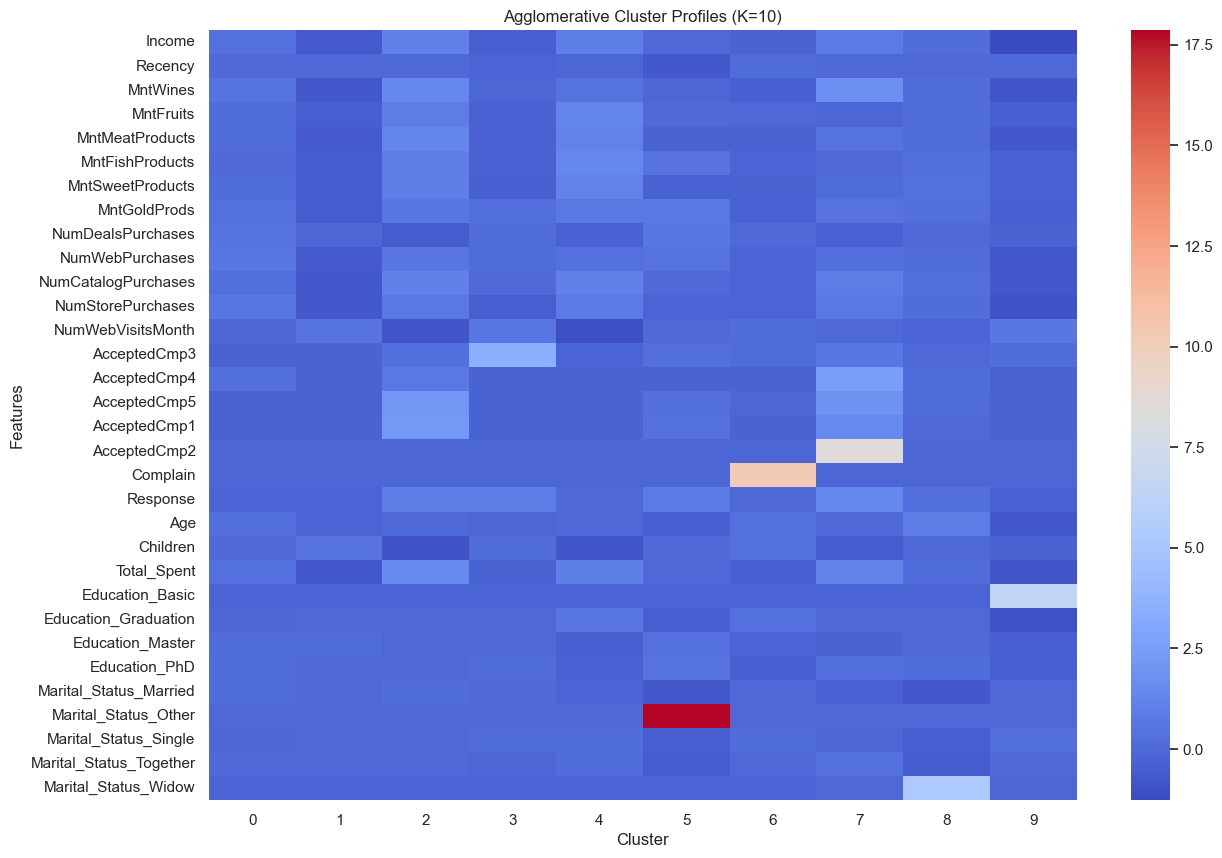

In [52]:
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_summary_agglo, cmap='coolwarm', annot=False)
plt.title('Agglomerative Cluster Profiles (K=10)')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()


### DBSCAN Model

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

# Fit DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Count number of clusters (excluding noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN identified {n_clusters} clusters and {n_noise} noise points.")


DBSCAN identified 19 clusters and 1120 noise points.


In [54]:
for eps in [3.0, 4.0, 5.0, 6.0]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(df_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps={eps} → Clusters: {n_clusters}, Noise Points: {n_noise}")


eps=3.0 → Clusters: 11, Noise Points: 816
eps=4.0 → Clusters: 9, Noise Points: 404
eps=5.0 → Clusters: 7, Noise Points: 169
eps=6.0 → Clusters: 6, Noise Points: 44


In [55]:
dbscan = DBSCAN(eps=5.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Add to dataframe
df_dbscan_labeled = df_scaled.copy()
df_dbscan_labeled['Cluster'] = dbscan_labels


In [56]:
# Filter out noise
mask = dbscan_labels != -1
filtered_data = df_scaled[mask]
filtered_labels = dbscan_labels[mask]

# Compute metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

dbscan_metrics_final = {
    'Model': 'DBSCAN (eps=5.0)',
    'Clusters': len(np.unique(filtered_labels)),
    'Noise Points': list(dbscan_labels).count(-1),
    'Silhouette': silhouette_score(filtered_data, filtered_labels),
    'Calinski-Harabasz': calinski_harabasz_score(filtered_data, filtered_labels),
    'Davies-Bouldin': davies_bouldin_score(filtered_data, filtered_labels)
}


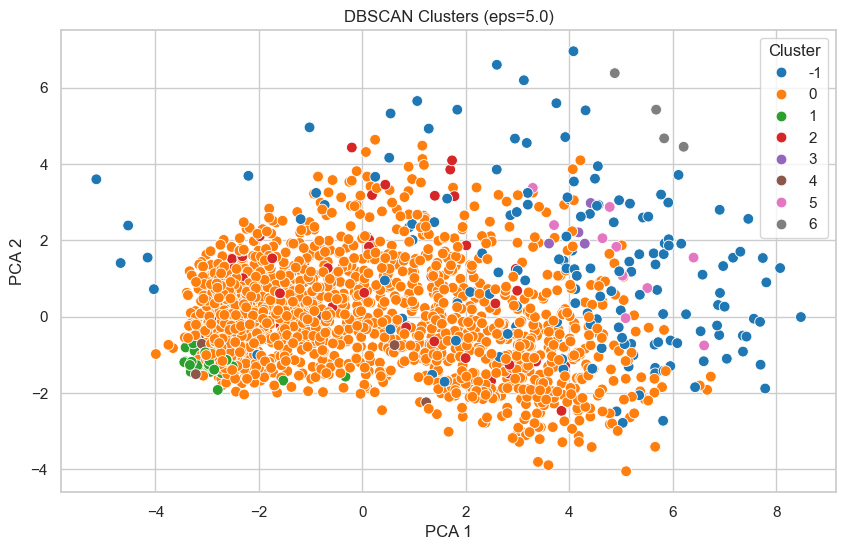

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pca_plot = PCA(n_components=2)
pca_2d = pca_plot.fit_transform(df_scaled)

plot_df = pd.DataFrame(pca_2d, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = dbscan_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60)
plt.title('DBSCAN Clusters (eps=5.0)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [58]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np
import pandas as pd

# Use your scaled data (replace df_scaled if your variable name differs)
X = df_scaled.copy()

# DBSCAN with your selected parameters
dbscan = DBSCAN(eps=5.0, min_samples=5)
labels = dbscan.fit_predict(X)

# Add to DataFrame for visibility
X_dbscan = X.copy()
X_dbscan['Cluster'] = labels

# Filter noise points (-1) for metric calculation
mask = labels != -1
filtered_X = X[mask]
filtered_labels = labels[mask]

# Calculate metrics only on clustered points
sil_score = silhouette_score(filtered_X, filtered_labels)
calinski = calinski_harabasz_score(filtered_X, filtered_labels)
davies = davies_bouldin_score(filtered_X, filtered_labels)

# Display result
dbscan_metrics = pd.DataFrame({
    'Model': ['DBSCAN'],
    'Silhouette': [sil_score],
    'Calinski-Harabasz': [calinski],
    'Davies-Bouldin': [davies]
})

display(dbscan_metrics)


Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
0  DBSCAN    0.212461          56.786617        1.112297

### Principal Component Analysis

In [59]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming your cleaned, scaled dataset is in a variable named `df_scaled`
# Exclude cluster labels if already added
features_only = df_scaled.drop(columns=['Cluster'], errors='ignore')

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(features_only)

# Create DataFrame of explained variance
explained_variance = pd.DataFrame({
    'Component': np.arange(1, len(pca.explained_variance_ratio_)+1),
    'Explained Variance': pca.explained_variance_ratio_,
    'Cumulative Variance': np.cumsum(pca.explained_variance_ratio_)
})

explained_variance.head(10)  # View first 10 components


Component  Explained Variance  Cumulative Variance
0          1            0.229660             0.229660
1          2            0.063879             0.293540
2          3            0.057561             0.351100
3          4            0.051052             0.402152
4          5            0.047130             0.449282
5          6            0.044284             0.493566
6          7            0.039451             0.533017
7          8            0.037891             0.570908
8          9            0.035801             0.606709
9         10            0.033378             0.640087

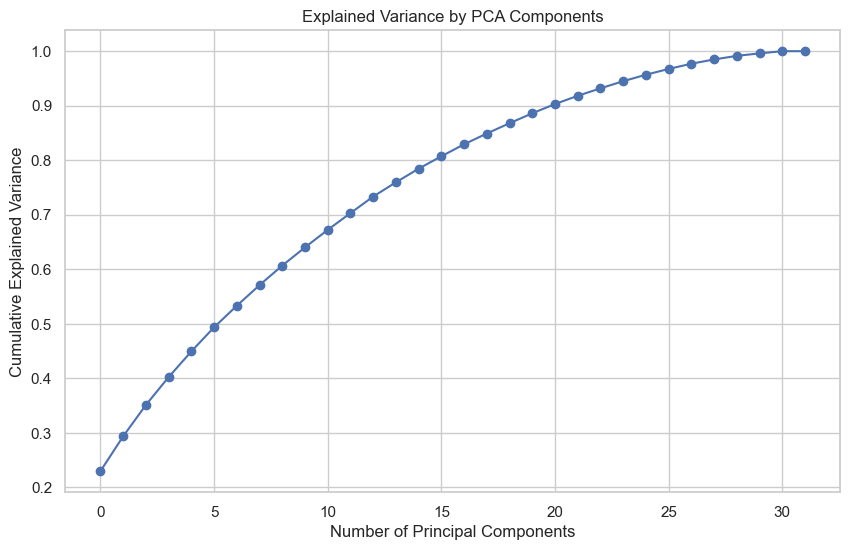

In [60]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [61]:
# Choose number of components to retain ~95% variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

pca_final = PCA(n_components=n_components)
df_pca = pca_final.fit_transform(features_only)


Number of components to retain 95% variance: 25


 KMeans (on PCA data)

In [63]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=10, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)


Agglomerative Clustering (on PCA data)

In [64]:
from sklearn.cluster import AgglomerativeClustering

agglo_pca = AgglomerativeClustering(n_clusters=10)
agglo_pca_labels = agglo_pca.fit_predict(pca_data)


 DBSCAN (on PCA data)

In [65]:
from sklearn.cluster import DBSCAN

dbscan_pca = DBSCAN(eps=5, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(pca_data)


In [66]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clusters(data, labels, model_name="Model"):
    if len(set(labels)) > 1 and -1 not in set(labels):
        sil = silhouette_score(data, labels)
        ch = calinski_harabasz_score(data, labels)
        db = davies_bouldin_score(data, labels)
    elif len(set(labels)) > 2:  # DBSCAN with noise
        mask = labels != -1
        sil = silhouette_score(data[mask], labels[mask])
        ch = calinski_harabasz_score(data[mask], labels[mask])
        db = davies_bouldin_score(data[mask], labels[mask])
    else:
        sil = ch = db = None
    return pd.Series({"Model": model_name, "Silhouette": sil, "Calinski-Harabasz": ch, "Davies-Bouldin": db})


In [67]:
results_pca = pd.DataFrame([
    evaluate_clusters(pca_data, kmeans_pca_labels, "KMeans (PCA)"),
    evaluate_clusters(pca_data, agglo_pca_labels, "Agglomerative (PCA)"),
    evaluate_clusters(pca_data, dbscan_pca_labels, "DBSCAN (PCA)")
])

results_pca.set_index("Model", inplace=True)
display(results_pca)


Silhouette  Calinski-Harabasz  Davies-Bouldin
Model                                                             
KMeans (PCA)           0.376622        2420.436280        0.844765
Agglomerative (PCA)    0.306698        2046.964118        0.910211
DBSCAN (PCA)                NaN                NaN             NaN

In [69]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

# Mask for valid DBSCAN clusters (exclude noise labeled as -1)
mask_db = dbscan_pca_labels != -1
unique_labels = set(dbscan_pca_labels[mask_db])

if len(unique_labels) > 1:
    dbscan_sil = silhouette_score(pca_data[mask_db], dbscan_pca_labels[mask_db])
    dbscan_ch = calinski_harabasz_score(pca_data[mask_db], dbscan_pca_labels[mask_db])
    dbscan_db = davies_bouldin_score(pca_data[mask_db], dbscan_pca_labels[mask_db])

    # Create and append DBSCAN results
    dbscan_row = pd.Series({
        "Model": "DBSCAN (PCA)",
        "Silhouette": dbscan_sil,
        "Calinski-Harabasz": dbscan_ch,
        "Davies-Bouldin": dbscan_db
    })

    results_pca = results_pca.reset_index()
    
    # Drop duplicate DBSCAN entries
    results_pca = results_pca[~results_pca["Model"].str.contains("DBSCAN", na=False)]

    results_pca


In [71]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

# Step 1: DBSCAN clustering should have been run, assume you have:
# dbscan_pca_labels = dbscan_model.fit_predict(pca_data)

# Step 2: Evaluate DBSCAN results only if valid clusters (more than 1 cluster and not all noise)
dbscan_valid_mask = dbscan_pca_labels != -1
n_clusters = len(set(dbscan_pca_labels)) - (1 if -1 in dbscan_pca_labels else 0)

# Create fresh results table if not created
try:
    results_pca
except NameError:
    results_pca = pd.DataFrame(columns=["Model", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])

if n_clusters > 1:
    try:
        dbscan_sil = silhouette_score(pca_data[dbscan_valid_mask], dbscan_pca_labels[dbscan_valid_mask])
        dbscan_ch = calinski_harabasz_score(pca_data[dbscan_valid_mask], dbscan_pca_labels[dbscan_valid_mask])
        dbscan_db = davies_bouldin_score(pca_data[dbscan_valid_mask], dbscan_pca_labels[dbscan_valid_mask])

        dbscan_row = pd.DataFrame([{
            "Model": "DBSCAN (PCA)",
            "Silhouette": dbscan_sil,
            "Calinski-Harabasz": dbscan_ch,
            "Davies-Bouldin": dbscan_db
        }])

        # Drop duplicates if re-running
        results_pca = results_pca[results_pca["Model"] != "DBSCAN (PCA)"]
        results_pca = pd.concat([results_pca, dbscan_row], ignore_index=True)

    except Exception as e:
        print("Error calculating DBSCAN scores:", e)
else:
    print(f"⚠️ DBSCAN (PCA) could not form enough valid clusters (only {n_clusters}). Skipping metrics.")

# Step 3: Display clean results
if not results_pca.empty and "Model" in results_pca.columns:
    results_pca.set_index("Model", inplace=True)
    display(results_pca)
else:
    print("⚠️ No results to display.")


⚠️ DBSCAN (PCA) could not form enough valid clusters (only 1). Skipping metrics.
⚠️ No results to display.


In [72]:
from sklearn.cluster import DBSCAN

# Tune for PCA space
dbscan_pca_model = DBSCAN(eps=1.5, min_samples=5)  # You can try 1.2, 1.8, etc.
dbscan_pca_labels = dbscan_pca_model.fit_predict(pca_data)

# Check how many clusters
unique, counts = np.unique(dbscan_pca_labels, return_counts=True)
print("Clusters formed (PCA):", dict(zip(unique, counts)))


Clusters formed (PCA): {np.int64(-1): np.int64(1), np.int64(0): np.int64(2239)}


In [73]:
# Try tuning eps for PCA-transformed space
for eps in [0.5, 0.8, 1.0, 1.2, 1.4]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    clusters, counts = np.unique(labels, return_counts=True)
    print(f"eps = {eps} → Clusters: {len(clusters)}, Distribution: {dict(zip(clusters, counts))}")


eps = 0.5 → Clusters: 4, Distribution: {np.int64(-1): np.int64(55), np.int64(0): np.int64(2168), np.int64(1): np.int64(12), np.int64(2): np.int64(5)}
eps = 0.8 → Clusters: 2, Distribution: {np.int64(-1): np.int64(22), np.int64(0): np.int64(2218)}
eps = 1.0 → Clusters: 2, Distribution: {np.int64(-1): np.int64(6), np.int64(0): np.int64(2234)}
eps = 1.2 → Clusters: 2, Distribution: {np.int64(-1): np.int64(4), np.int64(0): np.int64(2236)}
eps = 1.4 → Clusters: 2, Distribution: {np.int64(-1): np.int64(2), np.int64(0): np.int64(2238)}


In [75]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Choose best eps from previous results (e.g., 1.2)
chosen_eps = 1.2

# Run DBSCAN
dbscan = DBSCAN(eps=chosen_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(pca_data)

# Check how many clusters
n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"✔ DBSCAN (PCA) formed {n_clusters} clusters")

# Evaluate only if ≥ 2 clusters
if n_clusters >= 2:
    sil_score = silhouette_score(pca_data, labels_dbscan)
    ch_score = calinski_harabasz_score(pca_data, labels_dbscan)
    db_score = davies_bouldin_score(pca_data, labels_dbscan)

    print(f"Silhouette Score: {sil_score:.6f}")
    print(f"Calinski-Harabasz Score: {ch_score:.6f}")
    print(f"Davies-Bouldin Score: {db_score:.6f}")
else:
    print("⚠️ Not enough clusters formed. Evaluation skipped.")


✔ DBSCAN (PCA) formed 1 clusters
⚠️ Not enough clusters formed. Evaluation skipped.


In [77]:
from sklearn.cluster import DBSCAN
import numpy as np

# Try multiple eps values
for eps_val in [0.3, 0.5, 0.7, 0.9, 1.1, 1.3]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1])  # exclude noise

    print(f"eps = {eps_val}")
    print(f"→ Number of clusters (excluding noise): {n_clusters}")
    print(f"→ Cluster labels: {unique_labels}")
    print("-" * 40)


eps = 0.3
→ Number of clusters (excluding noise): 12
→ Cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
----------------------------------------
eps = 0.5
→ Number of clusters (excluding noise): 3
→ Cluster labels: [-1  0  1  2]
----------------------------------------
eps = 0.7
→ Number of clusters (excluding noise): 1
→ Cluster labels: [-1  0]
----------------------------------------
eps = 0.9
→ Number of clusters (excluding noise): 1
→ Cluster labels: [-1  0]
----------------------------------------
eps = 1.1
→ Number of clusters (excluding noise): 1
→ Cluster labels: [-1  0]
----------------------------------------
eps = 1.3
→ Number of clusters (excluding noise): 1
→ Cluster labels: [-1  0]
----------------------------------------


In [79]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

dbscan = DBSCAN(eps=best_eps, min_samples=5)
labels_dbscan = dbscan.fit_predict(pca_data)

# Check number of clusters
n_clusters = len(np.unique(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
print(f"→ Clusters formed (excluding noise): {n_clusters}")

# Evaluate if there are at least 2 clusters
if n_clusters >= 2:
    sil_db = silhouette_score(pca_data, labels_dbscan)
    ch_db = calinski_harabasz_score(pca_data, labels_dbscan)
    db_db = davies_bouldin_score(pca_data, labels_dbscan)

    print(f"Silhouette Score: {sil_db:.4f}")
    print(f"Calinski-Harabasz Score: {ch_db:.4f}")
    print(f"Davies-Bouldin Score: {db_db:.4f}")
else:
    print("DBSCAN with selected eps formed less than 2 valid clusters. Try another eps.")


→ Clusters formed (excluding noise): 1
DBSCAN with selected eps formed less than 2 valid clusters. Try another eps.


In [80]:
for eps_val in [1.5, 1.7, 2.0, 2.5, 3.0]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1])  # exclude noise

    print(f"eps = {eps_val}")
    print(f"→ Number of clusters (excluding noise): {n_clusters}")
    print(f"→ Cluster labels: {unique_labels}")
    print("-" * 40)


eps = 1.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [-1  0]
----------------------------------------
eps = 1.7
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 2.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 2.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 3.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------


In [81]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

dbscan = DBSCAN(eps=2.0, min_samples=5)  # replace with your best_eps
labels_dbscan = dbscan.fit_predict(pca_data)

# Exclude noise from evaluation
core_mask = labels_dbscan != -1
n_clusters = len(np.unique(labels_dbscan[core_mask]))

if n_clusters >= 2:
    sil = silhouette_score(pca_data[core_mask], labels_dbscan[core_mask])
    ch = calinski_harabasz_score(pca_data[core_mask], labels_dbscan[core_mask])
    db = davies_bouldin_score(pca_data[core_mask], labels_dbscan[core_mask])

    print(f"Silhouette Score: {sil:.4f}")
    print(f"Calinski-Harabasz Score: {ch:.4f}")
    print(f"Davies-Bouldin Score: {db:.4f}")
else:
    print("Still not enough clusters. Try a slightly higher eps.")


Still not enough clusters. Try a slightly higher eps.


In [82]:
from sklearn.cluster import DBSCAN
import numpy as np

# Try a wider range of eps values
for eps_val in [3.5, 4.0, 4.5, 5.0, 5.5, 6.0]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1])  # exclude noise

    print(f"eps = {eps_val}")
    print(f"→ Number of clusters (excluding noise): {n_clusters}")
    print(f"→ Cluster labels: {unique_labels}")
    print("-" * 40)


eps = 3.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 4.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 4.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 5.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 5.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 6.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------


In [83]:
from sklearn.cluster import DBSCAN
import numpy as np

# Try even higher eps values
for eps_val in [6.5, 7.0, 7.5, 8.0, 9.0, 10.0]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(pca_data)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels[unique_labels != -1])  # exclude noise

    print(f"eps = {eps_val}")
    print(f"→ Number of clusters (excluding noise): {n_clusters}")
    print(f"→ Cluster labels: {unique_labels}")
    print("-" * 40)


eps = 6.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 7.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 7.5
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 8.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 9.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------
eps = 10.0
→ Number of clusters (excluding noise): 1
→ Cluster labels: [0]
----------------------------------------


In [86]:
# Create a copy of your scaled DataFrame to preserve original
df_clustered = df_scaled.copy()

# Add cluster labels
df_clustered['KMeans_Cluster'] = kmeans_pca_labels
df_clustered['Agglo_Cluster'] = agglo_pca_labels


In [88]:
# Display the cluster profiles using standard pandas
print("📊 KMeans Cluster Profile (PCA)")
display(kmeans_profile)

print("\n📊 Agglomerative Cluster Profile (PCA)")
display(agglo_profile)


📊 KMeans Cluster Profile (PCA)


Income  Recency  MntWines  MntFruits  MntMeatProducts  \
KMeans_Cluster                                                          
0                -0.85     0.07     -0.84      -0.54            -0.66   
1                 1.47     0.08      1.48       1.45             2.04   
2                 0.36     0.11     -0.02       0.35             0.11   
3                 1.11    -0.09      2.05       0.25             1.05   
4                -0.59    -0.14     -0.74      -0.60            -0.64   
5                 0.85     0.03      0.34       1.53             1.16   
6                 0.42    -0.05      1.04      -0.05             0.02   
7                -0.04     0.02     -0.23      -0.37            -0.40   
8                 0.82    -0.03      0.99       0.72             1.07   
9                 0.17    -0.21      0.78      -0.48            -0.35   

                MntFishProducts  MntSweetProducts  MntGoldProds  \
KMeans_Cluster                                                    
0                         -0.55             -0.53         -0.57   
1                          1.66              1.51          0.93   
2                          0.39              0.41          0.41   
3                          0.25              0.31          0.34   
4                         -0.63             -0.60         -0.61   
5                          1.53              1.47          0.98   
6                         -0.08             -0.09          0.45   
7                         -0.37             -0.39         -0.01   
8                          0.70              0.71          0.49   
9                         -0.54             -0.52         -0.12   

                NumDealsPurchases  NumWebPurchases  ...  Education_Basic  \
KMeans_Cluster                                      ...                    
0                           -0.27            -0.82  ...             0.38   
1                           -0.67             0.43  ...            -0.16   
2                           -0.07             0.44  ...            -0.09   
3                           -0.34             0.76  ...            -0.16   
4                            0.14            -0.63  ...            -0.12   
5                           -0.48             0.28  ...            -0.16   
6                            0.53             0.89  ...            -0.16   
7                            0.54             0.32  ...            -0.16   
8                           -0.24             0.77  ...            -0.16   
9                            1.52             1.00  ...            -0.16   

                Education_Graduation  Education_Master  Education_PhD  \
KMeans_Cluster                                                          
0                               0.43             -0.27          -0.51   
1                               0.14              0.08          -0.18   
2                               0.49             -0.22          -0.39   
3                              -0.47              0.13           0.62   
4                              -0.83              0.41           0.72   
5                               0.68             -0.34          -0.44   
6                              -0.49              0.23           0.49   
7                              -0.02              0.18          -0.03   
8                              -0.20              0.02           0.24   
9                              -0.81              0.24           0.98   

                Marital_Status_Married  Marital_Status_Other  \
KMeans_Cluster                                                 
0                                 0.04                 -0.03   
1                                -0.07                  0.10   
2                                 0.06                 -0.06   
3                                 0.18                 -0.06   
4                                -0.02                 -0.00   
5                                -0.10                 -0.06   
6                               


📊 Agglomerative Cluster Profile (PCA)


Income  Recency  MntWines  MntFruits  MntMeatProducts  \
Agglo_Cluster                                                          
0                1.36     0.02      1.44       1.42             1.96   
1               -0.78     0.05     -0.81      -0.54            -0.65   
2                0.50    -0.03      0.72       0.30             0.28   
3                0.79     0.11      0.20       1.46             1.00   
4               -0.03    -0.18      0.07      -0.47            -0.40   
5                1.06     0.02      2.11       0.03             0.84   
6                0.02     0.10     -0.33      -0.18            -0.35   
7               -0.66    -0.13     -0.79      -0.62            -0.66   
8                0.28    -0.07      1.27      -0.41            -0.23   
9                0.82    -0.05      0.81       0.90             1.20   

               MntFishProducts  MntSweetProducts  MntGoldProds  \
Agglo_Cluster                                                    
0                         1.51              1.45          0.93   
1                        -0.57             -0.54         -0.57   
2                         0.29              0.28          0.53   
3                         1.48              1.29          0.76   
4                        -0.51             -0.46         -0.14   
5                         0.15              0.27          0.29   
6                        -0.16             -0.20          0.16   
7                        -0.64             -0.62         -0.68   
8                        -0.48             -0.46          0.11   
9                         0.92              0.99          0.67   

               NumDealsPurchases  NumWebPurchases  ...  Education_Basic  \
Agglo_Cluster                                      ...                    
0                          -0.61             0.48  ...            -0.16   
1                          -0.20            -0.77  ...             0.29   
2                           0.18             0.78  ...            -0.16   
3                          -0.48             0.27  ...            -0.12   
4                           0.92             0.56  ...            -0.16   
5                          -0.25             0.73  ...            -0.16   
6                           0.21             0.24  ...            -0.13   
7                           0.04            -0.78  ...            -0.12   
8                           1.27             1.08  ...            -0.16   
9                          -0.35             0.57  ...            -0.16   

               Education_Graduation  Education_Master  Education_PhD  \
Agglo_Cluster                                                          
0                              0.14              0.06          -0.14   
1                              0.27             -0.11          -0.44   
2                             -0.09              0.09           0.08   
3                              0.77             -0.40          -0.47   
4                             -0.66              0.33           0.71   
5                             -0.55              0.14           0.75   
6                              0.33             -0.06          -0.29   
7                             -0.93              0.30           1.05   
8                             -0.70             -0.03           1.10   
9                             -0.05             -0.05          -0.01   

               Marital_Status_Married  Marital_Status_Other  \
Agglo_Cluster                                                 
0                               -0.12                  0.06   
1                                0.02                 -0.03   
2                               -0.07                 -0.06   
3                               -0.02                 -0.06   
4                               -0.00                  0.24   
5                                0.21                 -0.06   
6                                0.01                 -0.06   
7                       

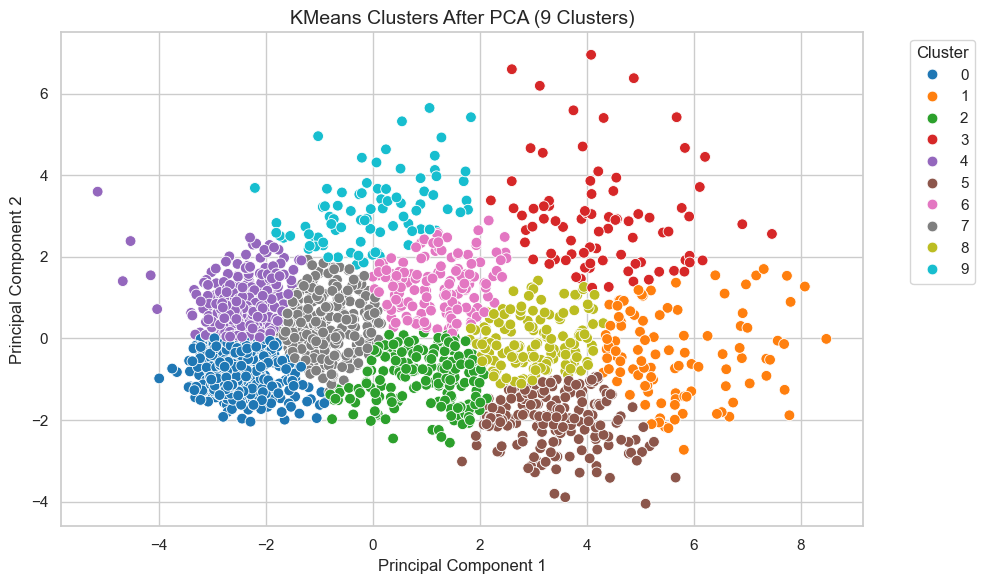

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert PCA-transformed data (df_pca) into a DataFrame
pca_df_2d = pd.DataFrame(df_pca[:, :2], columns=["PC1", "PC2"])
pca_df_2d["KMeans_Cluster"] = kmeans_pca_labels  # 9 clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_2d, x="PC1", y="PC2", hue="KMeans_Cluster", palette="tab10", s=60)

plt.title("KMeans Clusters After PCA (9 Clusters)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


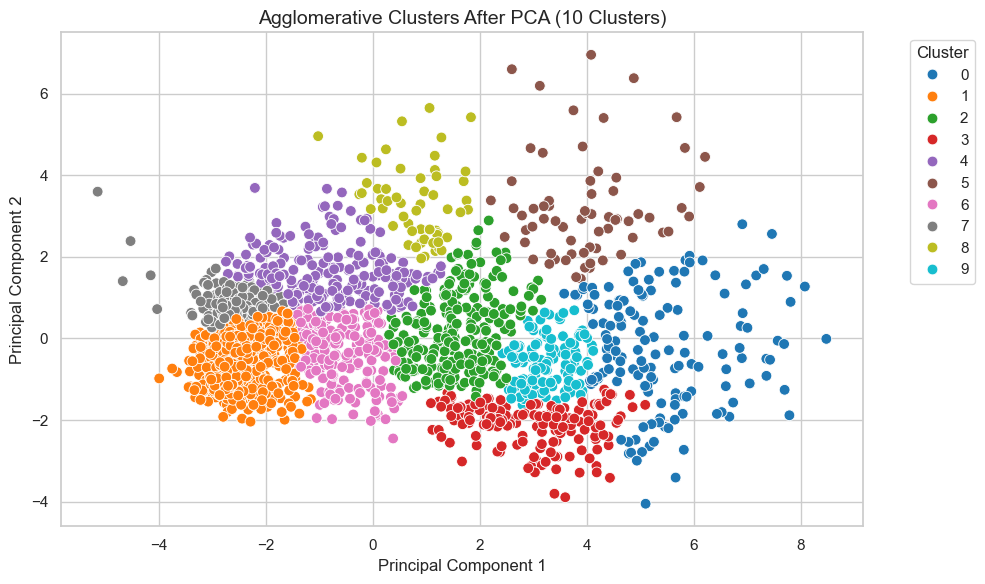

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Use the same PCA-transformed 2D data
pca_df_2d = pd.DataFrame(df_pca[:, :2], columns=["PC1", "PC2"])
pca_df_2d["Agglo_Cluster"] = agglo_pca_labels  # 10 clusters

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df_2d, x="PC1", y="PC2", hue="Agglo_Cluster", palette="tab10", s=60)

plt.title("Agglomerative Clusters After PCA (10 Clusters)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### PCA (90% Variance)

In [92]:
from sklearn.decomposition import PCA

# Use 90% variance threshold
pca_90 = PCA(n_components=0.90)
pca_data_90 = pca_90.fit_transform(df_scaled)
print(f"New shape after PCA (90% variance): {pca_data_90.shape}")


New shape after PCA (90% variance): (2240, 21)


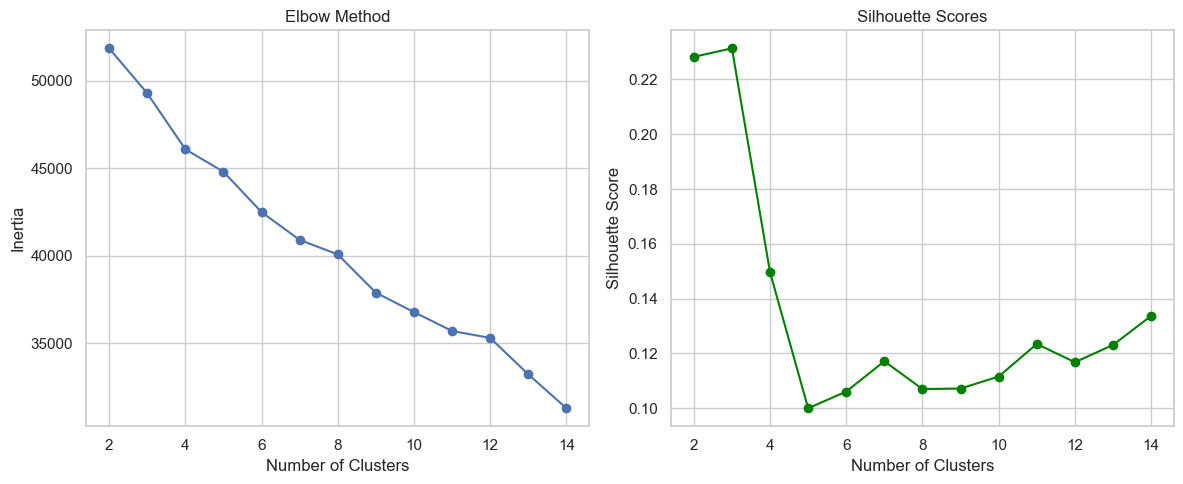

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
sil_scores = []
k_range = range(2, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(pca_data_90)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(pca_data_90, labels))

# Plot Elbow
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Plot Silhouette
plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [94]:
from sklearn.cluster import KMeans, AgglomerativeClustering

optimal_k = 3

# KMeans
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels_3 = kmeans_final.fit_predict(pca_data_90)

# Agglomerative
agglo_final = AgglomerativeClustering(n_clusters=optimal_k)
agglo_labels_3 = agglo_final.fit_predict(pca_data_90)


In [95]:
results_final = pd.DataFrame([
    evaluate_clusters(pca_data_90, kmeans_labels_3, "KMeans (PCA 90%, k=3)"),
    evaluate_clusters(pca_data_90, agglo_labels_3, "Agglomerative (PCA 90%, k=3)")
])

results_final.set_index("Model", inplace=True)
display(results_final)


Silhouette  Calinski-Harabasz  Davies-Bouldin
Model                                                                      
KMeans (PCA 90%, k=3)           0.231370         350.184652        1.580564
Agglomerative (PCA 90%, k=3)    0.128769         288.632353        2.932278